In [1]:
import metrics as m
import plotting as p
import numpy as np
from glob import glob
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.plotting import lag_plot
import seaborn as sns
from matplotlib.lines import Line2D
import residuos as r

# Functions

In [2]:
def lag_plot_series(real, fake, n_samples,path,figname,fmt="png",lagstep=1, loc_leg="best"):
    np.random.seed(0)
    ix = np.random.randint(0,len(real)-n_samples)
    real_s = real[ix:ix+n_samples]
    fake_s = fake[ix:ix+n_samples]
    fig, ax= plt.subplots(figsize=(5,3.5))
    lag_plot(real_s,alpha=0.5,ax=ax,c='red',label='Real',lag=lagstep)
    lag_plot(fake_s,alpha=0.5,ax=ax,c='blue',label='Sintético',marker='+',lag=lagstep)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlabel('y (t)',fontdict={'fontsize':13})
    plt.ylabel('y (t+{})'.format(lagstep),fontdict={'fontsize':13})
    plt.legend(loc='{}'.format(loc_leg))
    plt.tight_layout()
    plt.savefig(path+"{}.{}".format(figname,fmt))
    plt.show()
    plt.clf()
    plt.close()

In [2]:
def plot_sum(wk_real,df_fakes,figtt,wk,labels=[],linestyles=[],
             interval=24,loc_leg='upper right', xlabel="Horas", ylabel="Bicicletas alugadas"):
    
    fakes = []
    fig, ax = plt.subplots(figsize=(5.5,4))
    ax.plot(wk_real,label='Real')
    for i, df in enumerate(df_fakes):
        wk_fake = r.get_count(df,wk,interval)
        ax.plot(wk_fake,label=labels[i], ls=linestyles[i])
    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlabel("{}".format(xlabel), fontdict={'fontsize':12})
    plt.ylabel("{}".format(ylabel), fontdict={'fontsize':12})
    plt.tight_layout()
    plt.legend(loc='{}'.format(loc_leg))    
    plt.savefig("plots/sum_dfs_{}.pdf".format(figtt))
    plt.show()
    plt.clf()
    plt.close()

In [2]:
rua_000 = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")
rua_001 = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")
rua_002 = np.load("datasets/002_Av. Norte Sul_30min.npy")

In [5]:
scaler_r0 = MinMaxScaler().fit(rua_000.reshape(-1,1))
scaler_r1 = MinMaxScaler().fit(rua_001.reshape(-1,1))
scaler_r2 = MinMaxScaler().fit(rua_002.reshape(-1,1))

In [6]:
range_0_100 = np.arange(0,100,1)

In [8]:
random_rs = np.random.randn(100)

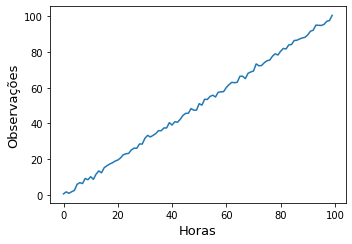

In [19]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(range_0_100+random_rs)
plt.xlabel("Horas",fontdict={'fontsize':13})
plt.ylabel("Observações",fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/trend_ts.pdf")

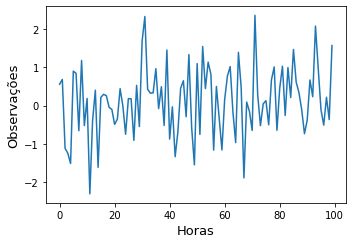

In [20]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(random_rs)
plt.xlabel("Horas",fontdict={'fontsize':13})
plt.ylabel("Observações",fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/random_ts.pdf")

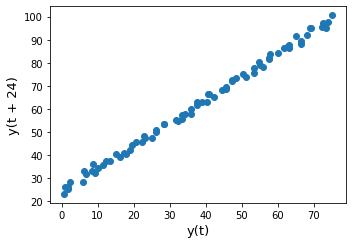

In [29]:
fig, ax = plt.subplots(figsize=(5,3.5))
series_trend = pd.Series(range_0_100+random_rs)
lag_plot(series_trend,lag=24,ax=ax)
plt.xlabel("y(t)",fontdict={'fontsize':13})
plt.ylabel("y(t + 24)",fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/lagplot_trend.pdf")

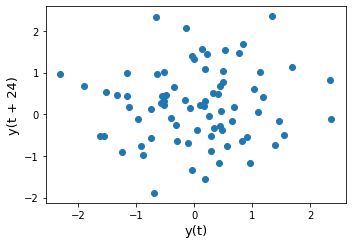

In [28]:
fig, ax = plt.subplots(figsize=(5,3.5))
series_random = pd.Series(random_rs)
lag_plot(series_random,lag=24,ax=ax)
plt.xlabel("y(t)",fontdict={'fontsize':13})
plt.ylabel("y(t + 24)",fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/lagplot_random.pdf")

# lag_plots carros vitória

## r000

In [15]:
fk_arima = np.load("arima/transito_vitoria/rua_I/samples/arima_r1_0.npy")
fk_crnngan = np.load("crnn/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
fk_rgan = np.load("rgan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
fk_timegan = np.load("timegan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")

In [7]:
path_arima="arima/transito_vitoria/rua_I/lag_plot/"
path_crnngan = "crnn/transito_vitoria/rua_I/lag_plot/"
path_rgan = "rgan/transito_vitoria/rua_I/lag_plot/"
path_timegan="timegan/transito_vitoria/rua_I/lag_plot/"

### ARIMA

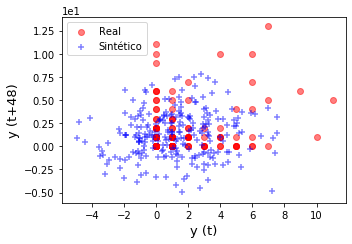

In [9]:
series_real = pd.Series(rua_000)
series_fake = pd.Series(fk_arima)
lag_plot_series(series_real,series_fake,288,path_arima,'arima_sample_0',"pdf",lagstep=48)

### C-RNN-GAN

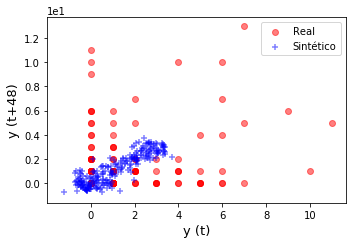

In [17]:
series_real = pd.Series(rua_000)
fk_crnngan = scaler_r0.inverse_transform(fk_crnngan.reshape(-1,1))
series_fake = pd.Series(fk_crnngan.flatten())
lag_plot_series(series_real,series_fake,288,path_crnngan,'crnngan_sample_0',"pdf",lagstep=48)

### RGAN

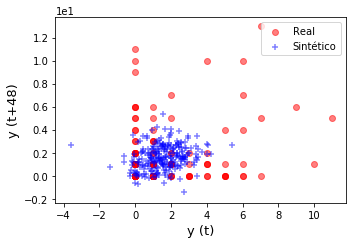

In [18]:
fk_rgan = scaler_r0.inverse_transform(fk_rgan.reshape(-1,1))
series_fake = pd.Series(fk_rgan.flatten())
lag_plot_series(series_real,series_fake,288,path_rgan,'rgan_sample_0',"pdf",lagstep=48)

### TimeGAN

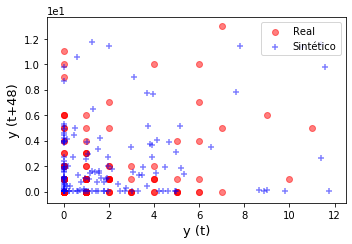

In [16]:
fk_timegan = scaler_r0.inverse_transform(fk_timegan.reshape(-1,1))
series_fake = pd.Series(fk_timegan.flatten())
lag_plot_series(series_real,series_fake,288,path_timegan,'timegan_sample_0',"pdf",lagstep=48, loc_leg='upper right')

## r001

In [24]:
fk_arima = np.load("arima/transito_vitoria/rua_II/samples/arima_r2_0.npy")
fk_crnngan = np.load("crnn/transito_vitoria/rua_II/samples_crnn_r001/sample_0_rua_II.npy")
fk_rgan = np.load("rgan/transito_vitoria/rua_II/samples/sample_0_rua_II.npy")
fk_timegan=np.load("timegan/transito_vitoria/rua_II/samples/sample_0_rua_II.npy")

path_arima = "arima/transito_vitoria/rua_II/lag_plot/"
path_crnngan = "crnn/transito_vitoria/rua_II/lag_plot/"
path_rgan = "rgan/transito_vitoria/rua_II/lag_plot/"
path_timegan = "timegan/transito_vitoria/rua_II/lag_plot/"

### ARIMA

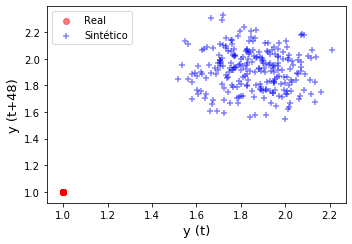

In [21]:
series_real = pd.Series(rua_001)
series_fake = pd.Series(fk_arima)
lag_plot_series(series_real,series_fake,288,path_arima,'arima_sample_0',"pdf",lagstep=48)

### C-RNN-GAN

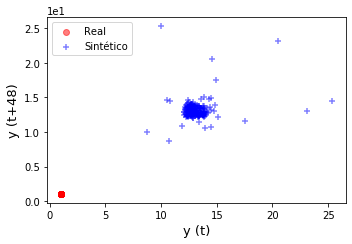

In [28]:
fk_crnngan = scaler_r1.inverse_transform(fk_crnngan.reshape(-1,1))
series_fake = pd.Series(fk_crnngan.flatten())
lag_plot_series(series_real,series_fake,288,path_crnngan,'crnngan_sample_0',"pdf",lagstep=48)

### RGAN

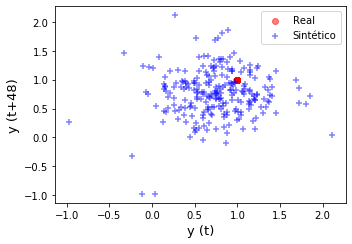

In [29]:
fk_rgan = scaler_r1.inverse_transform(fk_rgan.reshape(-1,1))
series_fake = pd.Series(fk_rgan.flatten())
lag_plot_series(series_real,series_fake,288,path_rgan,'rgan_sample_0',"pdf",lagstep=48)

### TimeGAN

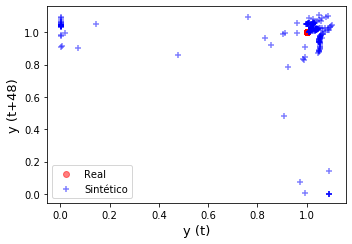

In [30]:
fk_timegan = scaler_r1.inverse_transform(fk_timegan.reshape(-1,1))
series_fake = pd.Series(fk_timegan.flatten())
lag_plot_series(series_real,series_fake,288,path_timegan,'timegan_sample_0',"pdf",lagstep=48)

## r002

In [33]:
fk_arima = np.load("arima/transito_vitoria/rua_III/samples/arima_r3_0.npy")
fk_crnngan = np.load("crnn/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")
fk_rgan = np.load("rgan/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")
fk_timegan=np.load("timegan/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")

path_arima = "arima/transito_vitoria/rua_III/lag_plot/"
path_crnngan = "crnn/transito_vitoria/rua_III/lag_plot/"
path_rgan = "rgan/transito_vitoria/rua_III/lag_plot/"
path_timegan = "timegan/transito_vitoria/rua_III/lag_plot/"

### ARIMA

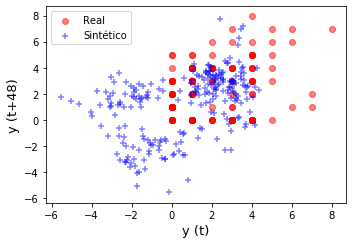

In [34]:
series_real = pd.Series(rua_002)
series_fake = pd.Series(fk_arima)
lag_plot_series(series_real,series_fake,288,path_arima,'arima_sample_0',"pdf",lagstep=48)

### C-RNN-GAN

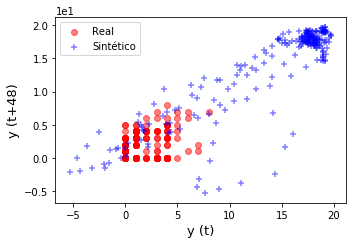

In [36]:
fk_crnngan = scaler_r2.inverse_transform(fk_crnngan.reshape(-1,1))
series_fake = pd.Series(fk_crnngan.flatten())
lag_plot_series(series_real,series_fake,288,path_crnngan,'crnngan_sample_0_rIII',"pdf",lagstep=48)

### RGAN

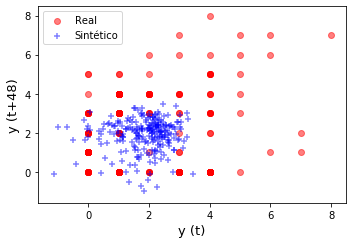

In [37]:
fk_rgan = scaler_r2.inverse_transform(fk_rgan.reshape(-1,1))
series_fake = pd.Series(fk_rgan.flatten())
lag_plot_series(series_real,series_fake,288,path_rgan,'rgan_sample_0_rIII',"pdf",lagstep=48)

### TimeGAN

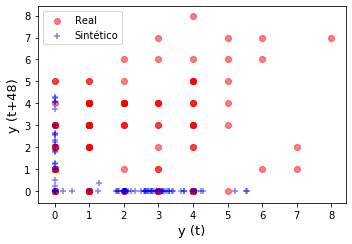

In [38]:
fk_timegan = scaler_r2.inverse_transform(fk_timegan.reshape(-1,1))
series_fake = pd.Series(fk_timegan.flatten())
lag_plot_series(series_real,series_fake,288,path_timegan,'timegan_sample_0_rIII',"pdf",lagstep=48)

## Lagplots bikesharing

In [77]:
patht = "timegan/bikesharing/lag_plot/"
pathr = "rgan/bikesharing/lag_plot/"
patha = "arima/bike_sharing/lag_plot/"
pathc = "crnn/bikesharing/lag_plot/"

In [84]:
bike_sharing = np.load("datasets/bike_sharing_2012to2019_inputed.npy")
timegan = np.load("timegan/bikesharing/samples/test_4_0.npy")
rgan = np.load("rgan/bikesharing/samples/0_sample_data_bike_test6_1960.npy")
arimab = np.load("arima/bike_sharing/sample_bike_arima_0.npy")
crnn = np.load("crnn/test12/sample_data_bike_test12_48_2021-03-24-14-22-20.npy")

In [85]:
scaler = MinMaxScaler().fit(bike_sharing.reshape(-1,1))

In [86]:
bike_sharing = pd.Series(bike_sharing.flatten())

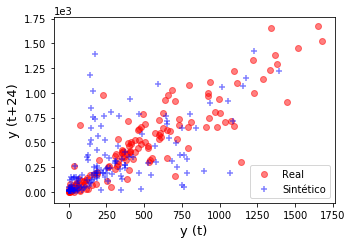

In [87]:
timegan = scaler.inverse_transform(timegan.reshape(-1,1)).flatten()
timegan = pd.Series(timegan)
lag_plot_series(bike_sharing,timegan,168,patht,"time_gan_4_bike",'pdf',24)

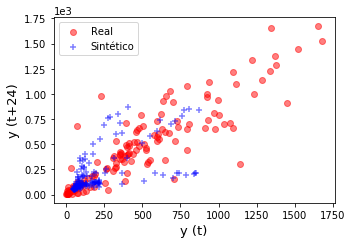

In [88]:
rgan = scaler.inverse_transform(rgan.reshape(-1,1)).flatten()
rgan = pd.Series(rgan)
lag_plot_series(bike_sharing,rgan,168,pathr,"rgan_gan_4_bike",'pdf',24)

In [26]:
bike_sharing_log = pd.Series(np.log(bike_sharing.values+1))

In [31]:
np.exp(bike_sharing_log.values)-1

array([ 16.,  40.,  32., ..., 111.,  80., 107.])

In [90]:
arimab = np.exp(arimab)

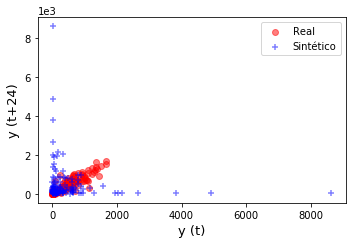

In [91]:
arimab = pd.Series(arimab)
lag_plot_series(bike_sharing,arimab,168,patha,"lag_plot_arima_bike","pdf",24)

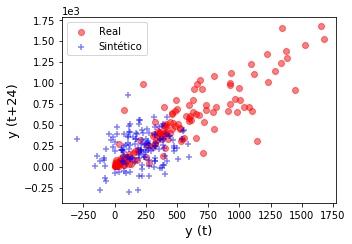

In [92]:
crnngan = scaler.inverse_transform(crnn.reshape(-1,1)).flatten()
crnngan = pd.Series(crnngan)
lag_plot_series(bike_sharing,crnngan,168,pathc,"crnngan_bike",'pdf',24)

# Resíduos Plots

## ARIMA

In [ ]:
arima_resid = np.load("arima/bikesharing/residuos/0_to_0.npy")
timegan_resid = np.load("timegan/bikesharing/residuos/resid_timegan_bike_0.npy")
rgan_resid = np.load("rgan/bikesharing/residuos/resid_timegan_bike_0.npy")
dfarima = pd.DataFrame(arima_resid,columns=['cnt'])
dftimegan = pd.DataFrame(timegan_resid,columns=['cnt'])
dfrgan = pd.DataFrame(rgan_resid,columns=['cnt'])

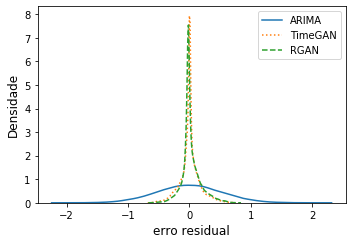

In [9]:
fig, ax = plt.subplots(figsize=(5,3.5))
sns.kdeplot(dfarima['cnt'].values,label="ARIMA",ax=ax)
sns.kdeplot(dftimegan['cnt'].values,label="TimeGAN",ls=':',ax=ax)
sns.kdeplot(dfrga['cnt'].values,label="RGAN",ls='--',ax=ax)
plt.xlabel('erro residual',fontdict={'fontsize':12})
plt.ylabel('Densidade',fontdict={'fontsize':12})
plt.tight_layout()
plt.savefig("residual_plots/kde_plot_residuos.pdf")

# Resíduos: means, std, plots

## Bikesharing

In [2]:
list_arima_resid = glob("arima/bikesharing/residuos/*.npy")
list_timegan_resid = glob("timegan/bikesharing/residuos/*.npy")
list_rgan_resid = glob("rgan/bikesharing/residuos/*.npy")

In [3]:
list_crrn_bike_resid = glob("crnn/bikesharing/residuos/*.npy")

In [4]:
array_list_crngan_bike = np.array([np.load(f) for f in list_crrn_bike_resid])
crnngan_res_bike = [np.mean(array_list_crngan_bike), np.std(array_list_crngan_bike)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


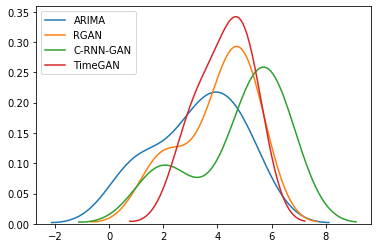

In [30]:
sns.kdeplot(df_kdes['ARIMA'])
sns.kdeplot(df_kdes['RGAN'])
sns.kdeplot(df_kdes['C-RNN-GAN'])
sns.kdeplot(df_kdes['TimeGAN'])
plt.savefig("plots/dist_plot_bikesharing.eps")

In [7]:
array_list_arima = [np.load(f) for f in list_arima_resid]
array_list_rgan = [np.load(f) for f in list_rgan_resid]
array_list_timegan = [np.load(f) for f in list_timegan_resid]

In [8]:
array_list_arima = np.array(array_list_arima)
array_list_timegan = np.array(array_list_timegan)
array_list_rgan = np.array(array_list_rgan)

In [37]:
arima_res = [np.mean(array_list_arima), np.std(array_list_arima)]
timegan_res = [np.mean(array_list_timegan), np.std(array_list_timegan)]
rgan_res = [np.mean(array_list_rgan), np.std(array_list_rgan)]

In [42]:
dict_mean_std = {
    'arima':arima_res,
    'TimeGAN':timegan_res,
    'RGAN':rgan_res,
    'metric':['mean','std']
}

In [47]:
df_mean_std = pd.DataFrame(dict_mean_std)
df_mean_std = df_mean_std.set_index('metric')

In [50]:
df_mean_std.to_csv("residual_plots/df_mean_std.csv")

In [68]:
scaler = MinMaxScaler().fit(rua_001.reshape(-1,1))
real_data_scaled = scaler.transform(rua_000.reshape(-1,1))
real_data_scaled = real_data_scaled.reshape(rua_000.shape)

In [57]:
np.save("datasets/rua_000_scaled.npy",real_data_scaled)

In [14]:
array_list_crngan_bike[0].shape

(78864,)

In [17]:
kdes = {
    'ARIMA':array_list_arima[0][:78864],
    'C-RNN-GAN':array_list_crngan_bike[0][:78864],
    'RGAN':array_list_rgan[0],
    'TimeGAN':array_list_timegan[0]
}

In [45]:
len(kdes['ARIMA']),len(kdes['C-RNN-GAN'])

(78888000, 78864000)

In [46]:
kdes["ARIMA"] = kdes["ARIMA"][:78864000]
kdes["RGAN"] = kdes["RGAN"][:78864000]
kdes["TimeGAN"] = kdes["TimeGAN"][:78864000]

In [18]:
df_kdes = pd.DataFrame(kdes)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


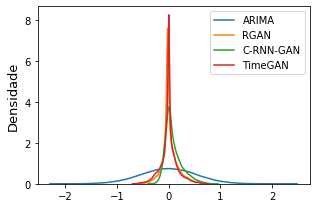

In [85]:
fig, ax = plt.subplots(figsize=(4.5, 3))
sns.kdeplot(df_kdes['ARIMA'], ax=ax)
sns.kdeplot(df_kdes['RGAN'],ax=ax)
sns.kdeplot(df_kdes['C-RNN-GAN'],ax=ax)
sns.kdeplot(df_kdes['TimeGAN'],ax=ax)
plt.ylabel("Densidade", fontdict={"fontsize":13})
plt.savefig("plots/dist_plot_bikesharing.eps")
plt.tight_layout()
plt.show()


# Residuos

## Rua 000

In [33]:
list_arima_resid_r0 = glob("arima/transito_vitoria/rua_I/residuos/*.npy")
list_timegan_resid_r0 = glob("timegan/transito_vitoria/rua_I/residuos/*.npy")
list_rgan_resid_r0 = glob("rgan/transito_vitoria/rua_I/residuos/*.npy")
list_resid_crnn_r0 = glob("crnn/transito_vitoria/rua_I/residuos/*.npy")

array_list_arima = np.array[np.load(f) for f in list_arima_resid_r0]
array_list_crnn_r0 = np.array([np.load(f) for f in list_resid_crnn_r0])
array_list_rgan_r0 = np.array([np.load(f) for f in list_rgan_resid_r0])
array_list_timegan_r0 = np.array([np.load(f) for f in list_timegan_resid_r0])

In [39]:
array_list_arima = np.array(array_list_arima)
# array_list_timegan = np.array(array_list_timegan)
# array_list_rgan = np.array(array_list_rgan)

In [7]:
arima_res = [np.mean(array_list_arima), np.std(array_list_arima)]
# timegan_res = [np.mean(array_list_timegan), np.std(array_list_timegan)]
# rgan_res = [np.mean(array_list_rgan), np.std(array_list_rgan)]

In [8]:
crnn_res_r0 = [np.mean(array_list_crnn_r0), np.std(array_list_crnn_r0)]


In [4]:

rgan_res_r0 = [np.mean(array_list_rgan_r0), np.std(array_list_rgan_r0)]

In [7]:

timegan_res_r0 = [np.mean(array_list_timegan_r0), np.std(array_list_timegan_r0)]

In [49]:
len(array_list_arima[0]), len(array_list_crnn_r0[0])

(12000, 11952)

In [8]:
dict_mean_std = {
    'arima':arima_res,
#     'TimeGAN':timegan_res,
#     'RGAN':rgan_res,
    'metric':['mean','std']
}

df_mean_std = pd.DataFrame(dict_mean_std)
df_mean_std = df_mean_std.set_index('metric')

In [53]:
kdes_r0 = {
    'ARIMA':array_list_arima[0][:11952],
    'C-RNN-GAN':array_list_crnn_r0[0][:11952],
    'RGAN':array_list_rgan_r0[0][:11952],
    'TimeGAN':array_list_timegan_r0[0][:11952]
}
df_kdes_r0 = pd.DataFrame(kdes_r0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


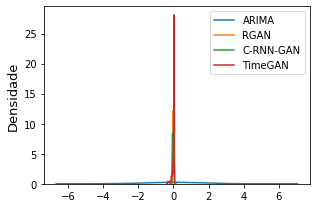

In [83]:
fig, ax = plt.subplots(figsize=(4.5, 3))
sns.kdeplot(df_kdes_r0['ARIMA'], ax=ax)
sns.kdeplot(df_kdes_r0['RGAN'],ax=ax)
sns.kdeplot(df_kdes_r0['C-RNN-GAN'],ax=ax)
sns.kdeplot(df_kdes_r0['TimeGAN'],ax=ax)
plt.ylabel("Densidade", fontdict={"fontsize":13})
plt.savefig("plots/dist_plot_ruaI.eps")
plt.tight_layout()
plt.show()

## Rua 001

In [57]:
list_arima_resid_r1 = glob("arima/transito_vitoria/rua_II/residuos/*.npy")
list_timegan_resid_r1 = glob("timegan/transito_vitoria/rua_II/residuos/*.npy")
list_rgan_resid_r1 = glob("rgan/transito_vitoria/rua_II/residuos/*.npy")
list_resid_crnn_r1 = glob("crnn/transito_vitoria/rua_II/residuos/*.npy")

In [58]:
array_list_arima_r1 = [np.load(f) for f in list_arima_resid_r1]
array_list_arima_r1 = np.array(array_list_arima_r1)
arima_res_r1 = [np.mean(array_list_arima_r1), np.std(array_list_arima_r1)]

In [59]:
array_list_timegan_r1 = [np.load(f) for f in list_timegan_resid_r1]
array_list_timegan_r1 = np.array(array_list_timegan_r1)
timegan_res_r1 = [np.mean(array_list_timegan_r1), np.std(array_list_timegan_r1)]

In [60]:
array_list_rgan_r1 = np.array([np.load(f) for f in list_rgan_resid_r1])
rgan_res_r1 = [np.mean(array_list_rgan_r1), np.std(array_list_rgan_r1)]

In [62]:
array_list_crnn_r1 = np.array([np.load(f) for f in list_resid_crnn_r1])
crnn_res_r1 = [np.mean(array_list_crnn_r1), np.std(array_list_crnn_r1)]

In [88]:
crnn_res_r1

[0.30004174, 0.018717678]

In [16]:
rgan_res_r1

[0.31612563, 0.0944235]

In [14]:
timegan_res_r1

[0.314525, 0.13181716]

In [46]:
dict_mean_std_r1 = {
    'arima':arima_res_r1,
#     'TimeGAN':timegan_res,
#     'RGAN':rgan_res,
    'metric':['mean','std']
}

df_mean_std_r1 = pd.DataFrame(dict_mean_std_r1)
df_mean_std_r1 = df_mean_std_r1.set_index('metric')
df_mean_std_r1

In [64]:
len(array_list_crnn_r1[0])

10992

In [65]:
kdes_r1 = {
    'ARIMA':array_list_arima_r1[0][:10992],
    'C-RNN-GAN':array_list_crnn_r1[0][:10992],
    'RGAN':array_list_rgan_r1[0][:10992],
    'TimeGAN':array_list_timegan_r1[0][:10992]
}
df_kdes_r1 = pd.DataFrame(kdes_r1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


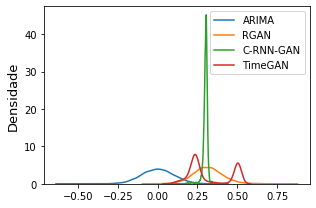

In [82]:
fig, ax = plt.subplots(figsize=(4.5, 3))
sns.kdeplot(df_kdes_r1['ARIMA'], ax=ax)
sns.kdeplot(df_kdes_r1['RGAN'],ax=ax)
sns.kdeplot(df_kdes_r1['C-RNN-GAN'],ax=ax)
sns.kdeplot(df_kdes_r1['TimeGAN'],ax=ax)
plt.ylabel("Densidade", fontdict={"fontsize":13})
plt.savefig("plots/dist_plot_ruaII.eps")
plt.tight_layout()
plt.show()

## Rua III

In [68]:
list_arima_resid_r2 = glob("arima/transito_vitoria/rua_III/residuos/*.npy")
list_timegan_resid_r2 = glob("timegan/transito_vitoria/rua_III/residuos/*.npy")
list_rgan_resid_r2 = glob("rgan/transito_vitoria/rua_III/residuos/*.npy")
list_resid_crnn_r2 = glob("crnn/transito_vitoria/rua_III/residuos/*.npy")

In [69]:
array_list_arima_r2 = [np.load(f) for f in list_arima_resid_r2]
array_list_arima_r2 = np.array(array_list_arima_r2)
arima_res_r2 = [np.mean(array_list_arima_r2), np.std(array_list_arima_r2)]

In [70]:
array_list_timegan_r2 = np.array([np.load(f) for f in list_timegan_resid_r2])
timegan_res_r2 = [np.mean(array_list_timegan_r2), np.std(array_list_timegan_r2)]

In [71]:
array_list_rgan_r2 = np.array([np.load(f) for f in list_rgan_resid_r2])
rgan_res_r2 = [np.mean(array_list_rgan_r2), np.std(array_list_rgan_r2)]

In [73]:
array_list_crnngan_r2 = np.array([np.load(f) for f in list_resid_crnn_r2])
crnngan_res_r2 = [np.mean(array_list_crnngan_r2), np.std(array_list_crnngan_r2)]

In [5]:
dict_mean_std_r2 = {
    'arima':arima_res_r2,
#     'TimeGAN':timegan_res,
#     'RGAN':rgan_res,
    'metric':['mean','std']
}

df_mean_std_r2 = pd.DataFrame(dict_mean_std_r2)
df_mean_std_r2 = df_mean_std_r2.set_index('metric')
df_mean_std_r2

arima
metric          
mean    0.000030
std     0.748443

In [75]:
len(array_list_crnngan_r2[0])

12288

In [77]:
kdes_r2 = {
    'ARIMA':array_list_arima_r2[0][:12288],
    'C-RNN-GAN':array_list_crnngan_r2[0][:12288],
    'RGAN':array_list_rgan_r2[0][:12288],
    'TimeGAN':array_list_timegan_r2[0][:12288]
}
df_kdes_r2 = pd.DataFrame(kdes_r2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


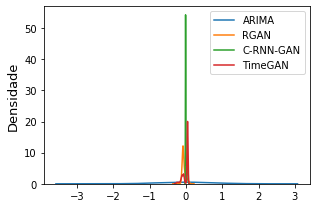

In [81]:
fig, ax = plt.subplots(figsize=(4.5, 3))
sns.kdeplot(df_kdes_r2['ARIMA'], ax=ax)
sns.kdeplot(df_kdes_r2['RGAN'],ax=ax)
sns.kdeplot(df_kdes_r2['C-RNN-GAN'],ax=ax)
sns.kdeplot(df_kdes_r2['TimeGAN'],ax=ax)
plt.ylabel("Densidade", fontdict={"fontsize":13})
plt.savefig("plots/dist_plot_ruaIII.eps")
plt.tight_layout()
plt.show()

# Rua 000

In [3]:
rua_I = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")
rua_II = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")
rua_III = np.load("datasets/002_Av. Norte Sul_30min.npy")

In [4]:
rua_I = rua_I.reshape(int(12000/48), 48, 1)
rua_II = rua_II.reshape(11040//48,48,1)
rua_III = rua_III.reshape(12336//48,48,1)

In [ ]:
a = "rgan/waze/test1/"

In [7]:
list_dates_rI = r.get_list_dates(rua_I.shape[0]*rua_I.shape[1],2019,3,28, timedelta(minutes=30))
df_rI = p.get_df(list_dates_rI, rua_I, w=48)

list_dates_rII = r.get_list_dates(rua_II.shape[0]*rua_II.shape[1],2019,4,17, timedelta(minutes=30))
df_rII = r.get_df_real(list_dates_rII, rua_II,w=48)

list_dates_rIII = r.get_list_dates(rua_III.shape[0]*rua_III.shape[1],2019,3,21, timedelta(minutes=30))
df_rIII = r.get_df_real(list_dates_rIII, rua_III,w=48)

In [17]:
s0 = np.load("arima/transito_vitoria/rua_I/samples/arima_r1_0.npy")
s1 = np.load("timegan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
s2 = np.load("rgan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
s3 = np.load("crnn/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")

In [18]:
# # s0 = np.load("arima/waze/000/")
# s1 = np.load("timegan/waze/kaggle/000/sample_data_waze_test4_3000.npy")
# s2 = np.load("rgan/waze/test1/sample_data_waze_test1_50.npy")
# s3 = np.load("crnn/waze/test2/000/sample_data_waze_test2_80_2021-04-06-19-16-19.npy")

In [17]:
wks = [r.get_count(df_rI,i,48) for i in range(7)]
wks_II = [r.get_count(df_rII,i,48) for i in range(7)]
wks_III = [r.get_count(df_rIII,i,48) for i in range(7)]

### Rua I

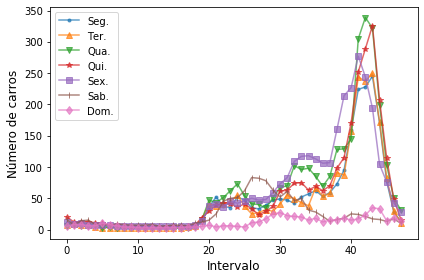

In [30]:
fig, ax = plt.subplots()
ax.plot(wks[0],label='Seg.',marker='.',alpha=0.7)
ax.plot(wks[1],label='Ter.',marker='^',alpha=0.7)
ax.plot(wks[2],label='Qua.',marker='v',alpha=0.7)
ax.plot(wks[3],label='Qui.',marker='*',alpha=0.7)
ax.plot(wks[4],label='Sex.',marker='s',alpha=0.7)
ax.plot(wks[5],label='Sab.',marker='|',alpha=0.7)
ax.plot(wks[6],label='Dom.',marker='d',alpha=0.7)
plt.xlabel("Intervalo", fontdict={'fontsize':12})
plt.ylabel("Número de carros", fontdict={'fontsize':12})
plt.tight_layout()
plt.legend()    
plt.savefig("plots/sum_dfs_dias_rua_I.pdf")
plt.show()
# plt.clf()
# plt.close()

### Rua II

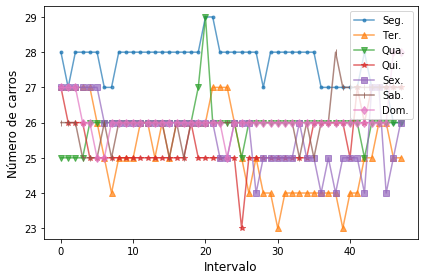

In [28]:
fakes = []
fig, ax = plt.subplots()
ax.plot(wks_II[0],label='Seg.',marker='.',alpha=0.7)
ax.plot(wks_II[1],label='Ter.',marker='^',alpha=0.7)
ax.plot(wks_II[2],label='Qua.',marker='v',alpha=0.7)
ax.plot(wks_II[3],label='Qui.',marker='*',alpha=0.7)
ax.plot(wks_II[4],label='Sex.',marker='s',alpha=0.7)
ax.plot(wks_II[5],label='Sab.',marker='|',alpha=0.7)
ax.plot(wks_II[6],label='Dom.',marker='d',alpha=0.7)
plt.xlabel("Intervalo", fontdict={'fontsize':12})
plt.ylabel("Número de carros", fontdict={'fontsize':12})
plt.tight_layout()
plt.legend(loc='upper right') 
plt.savefig("plots/sum_dfs_dias_rua_II.pdf")
plt.show()
# plt.clf()
# plt.close()

### Rua III

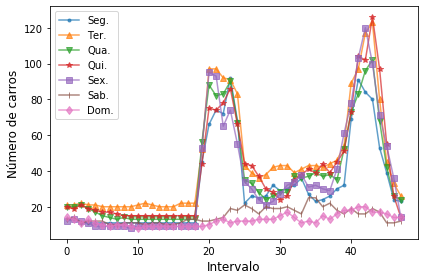

In [27]:
fakes = []
fig, ax = plt.subplots()
ax.plot(wks_III[0],label='Seg.',marker='.',alpha=0.7)
ax.plot(wks_III[1],label='Ter.',marker='^',alpha=0.7)
ax.plot(wks_III[2],label='Qua.',marker='v',alpha=0.7)
ax.plot(wks_III[3],label='Qui.',marker='*',alpha=0.7)
ax.plot(wks_III[4],label='Sex.',marker='s',alpha=0.7)
ax.plot(wks_III[5],label='Sab.',marker='|',alpha=0.7)
ax.plot(wks_III[6],label='Dom.',marker='d',alpha=0.7)
plt.xlabel("Intervalo", fontdict={'fontsize':12})
plt.ylabel("Número de carros", fontdict={'fontsize':12})
plt.tight_layout()
plt.legend()    
plt.savefig("plots/sum_dfs_dias_ruas_III.pdf")
plt.show()
# plt.clf()
# plt.close()

In [4]:
rua4 = np.load("data_rua_4_rua_17.npy", allow_pickle=True)

In [6]:
rua4 = rua4.reshape(12000, 14)

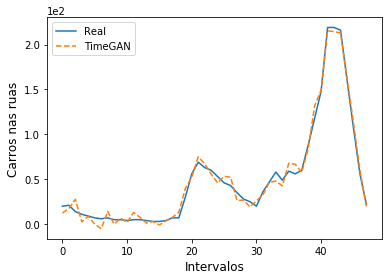

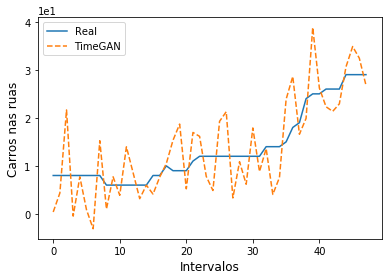

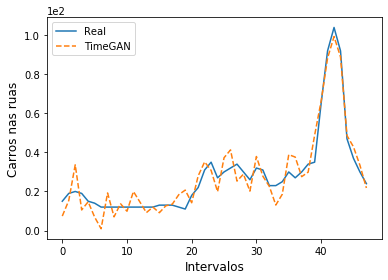

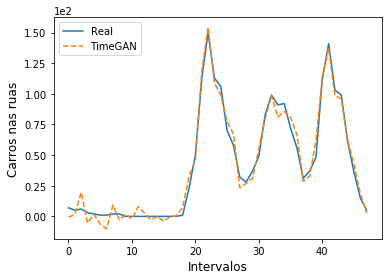

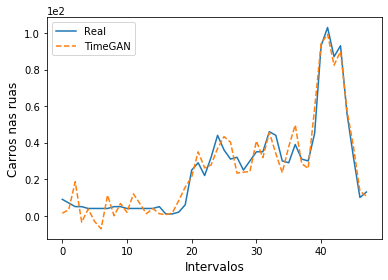

In [39]:
list_dates = r.get_list_dates(12000,2019,3,28, timedelta(minutes=30))
rand = np.random.randn(12000)
for i in range(5):
    street = rua4[:,i]
    street_fake = street + rand
    
    df_rua4 = r.get_df_real(list_dates, street.reshape(250,48,1), w=48)
    df_fk = r.get_df_real(list_dates, street_fake.reshape(250, 48, 1), w=48)
    wk_real_r4 = r.get_count(df_rua4,4,48)
    plot_sum(wk_real_r4,[df_fk],"rua_I",4,labels=['TimeGAN','RGAN','ARIMA','C-RNN-GAN'],linestyles=['--','-.',':','-'], interval=48)

In [6]:
sample = np.random.randn(24)

In [8]:
std = sample.std()

In [11]:
sample - std

array([-0.89330402, -0.82983365, -0.80417312, -2.91228621, -0.68269335,
       -0.22452003, -0.12249249, -2.70096282, -1.37534782, -2.08885737,
       -1.36024528, -0.24327543, -1.28221228, -2.56126951, -1.66849251,
        0.4981355 , -0.64958535, -0.76964471,  0.05176259,  0.1060693 ,
       -1.10291711,  0.60492838, -0.22452027, -1.53794501])

In [9]:
clrs = sns.color_palette("husl", 5)

In [13]:
arima_r0 = np.load("arima/transito_vitoria/rua_I/samples/arima_r1_0.npy")
timegan_r0 = np.load("timegan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
rgan_r0 = np.load("rgan/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")
crnn_r0 = np.load("crnn/transito_vitoria/rua_I/samples/sample_0_rua_I.npy")

In [73]:
arima_samples = glob("arima/transito_vitoria/rua_I/samples/*.npy")
timegan_samples = glob("timegan/transito_vitoria/rua_I/samples/*.npy")
rgan_samples = glob("rgan/transito_vitoria/rua_I/samples/*.npy")
crnngan_samples = glob("crnn/transito_vitoria/rua_I/samples/*.npy")
# timegan_r0 = np.load("timegan/waze/000/samples/test_r0_0.npy")
# rgan_r0 = np.load("rgan/waze/000/samples/0_sample_data_waze_test2_2940.npy")
# crnn_r0 = np.load("crnn/waze/000/samples/generated_data/sample_data_waze_test1_198_2021-04-16-16-36-47.npy")

In [15]:
def get_list_wks(model_samples, real_data, list_dates_real, timestep, ix):
    """    
    params:

    - real data (for shape)
    - list dates
    - wk



    """
    list_wks = []
    for i, s in enumerate(model_samples):
        # reshape
        s = np.load(s)
        sample_reshaped = s.reshape(real_data.shape)
        df_sample = p.get_df(list_dates_real,sample_reshaped,w=timestep)    
        wk_fake = r.get_count(df_sample,4,timestep)
        list_wks.append(wk_fake)
        if (i % 50 == 0):
            print ("Done {}!".format(i))
    return list_wks

In [2]:
ruas = np.load("timegan/transito_vitoria/ruas/samples/timegan_r4_8_0.npy")

In [8]:
A = np.array([["A", "B", "C"],["A", "B", "C"],["A", "B", "C"],["A", "B", "C"]])

In [15]:
A = A.reshape(2,3,2)

In [20]:
A[:, :, 0]

array([['A', 'C', 'B'],
       ['A', 'C', 'B']], dtype='<U1')

In [2]:
#Real, Arima, c-rnn-gan, rgan, timegan
cores = {'real': "#1f77b4", 'arima':"#ff7f0e", 'crnngan':"#2ca02c", 'rgan':"#d62728", 'timegan':"#9467bd"}

In [18]:
columns_df = list(np.arange(0,48,1).astype('str'))

### Bikesharing

In [21]:
bike_real = np.load("datasets/bike_sharing_2012to2019_inputed.npy")
scaler = MinMaxScaler().fit(bike_real.reshape(-1,1))

df_bike_sextas_timegan = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_timegan.csv", index_col=0)
df_bike_sextas_rgan    = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_rgan.csv", index_col=0)
df_bike_sextas_crnngan = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_crnngan.csv", index_col=0)
df_bike_sextas_arima   = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_arima.csv", index_col=0)

In [24]:
stds_bike_timegan = df_bike_sextas_timegan.std(axis=0)
stds_bike_rgan    = df_bike_sextas_rgan.std(axis=0)
stds_bike_crnngan = df_bike_sextas_crnngan.std(axis=0)
stds_bike_arima   = df_bike_sextas_arima.std(axis=0)

means_bike_timegan = df_bike_sextas_timegan.mean(axis=0)
means_bike_rgan    = df_bike_sextas_rgan.mean(axis=0)
means_bike_crnngan = df_bike_sextas_crnngan.mean(axis=0)
means_bike_arima   = df_bike_sextas_arima.mean(axis=0)

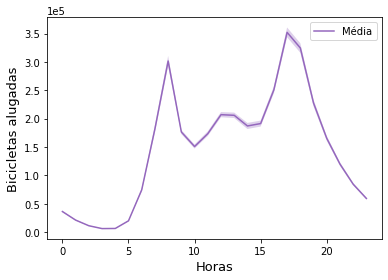

In [9]:
save_shaded_mean_std(means_bike_timegan, stds_bike_timegan, 
                     scaler_s=scaler, cor=cores['timegan'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_timegan_media.pdf', sci=True)

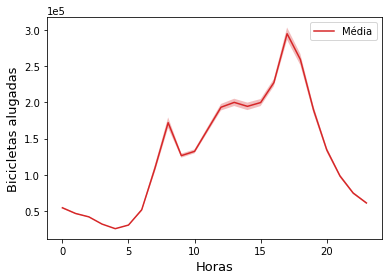

In [10]:
save_shaded_mean_std(means_bike_rgan, stds_bike_rgan, 
                     scaler_s=scaler, cor=cores['rgan'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_rgan_media.pdf',sci=True)

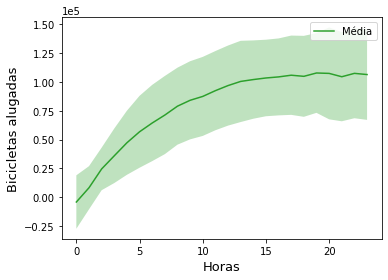

In [12]:
save_shaded_mean_std(means_bike_crnngan, stds_bike_crnngan, 
                     scaler_s=scaler, cor=cores['crnngan'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_crnngan_media.pdf', sci=True)

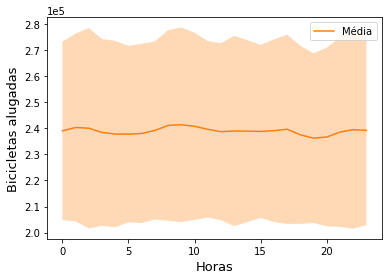

In [34]:
save_shaded_mean_std(means_bike_arima, stds_bike_arima, 
                     scaler_s=scaler, cor=cores['arima'],
                     w=24, xlabel='Horas', ylabel='Bicicletas alugadas',
                     path='bike_arim_media.pdf', sci=True)

In [32]:
df_bike_sextas_arima

0              1              2              3  \
0    222073.952684  245054.189877  228170.535788  210037.058418   
1    232402.145653  274977.846869  289602.079522  229732.029264   
2    228721.507947  258757.263638  275291.643004  257385.226458   
3    187711.377715  200372.271379  236080.850543  267645.711809   
4    202925.660594  195741.372876  179512.692032  192470.398205   
..             ...            ...            ...            ...   
995  269273.307898  277939.911964  263885.137536  237344.565150   
996  217561.564111  241172.679867  248718.918012  237437.535069   
997  184722.843517  184892.973541  187339.885088  211457.757260   
998  223846.986963  192203.900339  181328.147586  190151.403925   
999  213254.292950  203126.200138  230996.379548  236406.928547   

                 4              5              6              7  \
0    209953.401200  234010.787696  273286.274181  244047.558697   
1    209366.737148  209014.979997  242293.953542  255038.920128   
2    258233.283549  243833.193737  216319.381715  235613.712779   
3    238775.178611  203770.111189  204559.084829  210198.303133   
4    204552.804345  228807.140324  236674.674838  242099.657577   
..             ...            ...            ...            ...   
995  238627.058487  234670.144438  244768.347037  209097.156054   
996  206233.434191  203821.322811  182294.450272  163069.288154   
997  213054.504115  229868.973883  216130.236729  223249.098741   
998  198227.642125  216255.674188  227438.520919  250952.602345   
999  233803.970120  246208.261165  267574.374850  276236.939292   

                 8              9  ...             14             15  \
0    237471.340493  224456.003498  ...  244525.441690  238463.161777   
1    255710.899970  257053.053031  ...  267925.619916  230138.057506   
2    298600.590555  290237.130521  ...  222403.205223  227499.847665   
3    252605.406217  287872.512519  ...  364247.072408  322037.438732   
4    229734.825634  239671.483767  ...  239850.727068  254085.305760   
..             ...            ...  ...            ...            ...   
995  220020.004758  218502.523934  ...  212756.924615  218790.839080   
996  177847.559191  198606.361230  ...  232840.958580  218261.060336   
997  233060.822522  270771.838536  ...  241572.149923  257903.199966   
998  308128.407183  382768.768570  ...  232383.997920  235738.994216   
999  316767.481735  296999.920847  ...  237120.315854  239117.619087   

                16             17             18             19  \
0    224964.344764  256046.257508  250156.475872  232470.580906   
1    212123.402467  201074.409557  212893.168027  217363.212029   
2    229006.102669  232989.348309  217384.168327  198679.468718   
3    235553.125874  213892.303720  200718.200808  204788.840033   
4    261446.269449  246794.237834  234259.767005  218464.543708   
..             ...            ...            ...            ...   
995  286154.147586  401404.547752  322594.650703  304357.228991   
996  199590.799726  213823.306447  217058.763260  234202.160228   
997  267807.903031  252097.496811  235333.291671  198489.108416   
998  227154.201625  228498.713002  223386.462465  227876.809747   
999  265399.285030  289252.744057  271148.101408  260802.573404   

                20             21             22             23  
0    229150.101434  211792.954286  218296.211143  220745.695283  
1    226864.242011  201961.741354  212517.935376  211280.996724  
2    194095.491514  202145.117033  227927.389596  248823.878262  
3    255084.755847  307508.906389  284895.607877  277620.257450  
4    235143.541852  222525.818756  240972.602247  269563.293315  
..             ...            ...            ...            ...  
995  329509.439041  283389.656318  231675.921509  215743.622093  
996  269303.695274  252937.894724  204911.530400  197540.187921  
997  202301.876341  224044.295307  228803.786738  231582.757846  
998  209036.924486  218856.483388  196564.986928  206503.661186  
999  263649

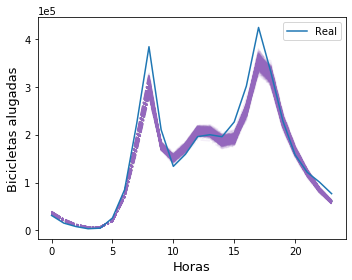

In [65]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_bike_sextas_timegan.iloc[i].values
    s = scaler.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 24, 1), s.flatten(), c='#9467bd', alpha=0.1, ls='-.')
ax.plot(np.arange(0,24, 1), wk_real_sexta, label='Real')
ax.set_xlabel("Horas", fontdict={'fontsize':13})
ax.set_ylabel("Bicicletas alugadas", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/bikesharing/bike_timegan.pdf")

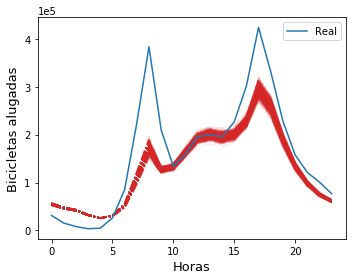

In [10]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_bike_sextas_rgan.iloc[i].values
    s = scaler.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 24, 1), s.flatten(), c="#d62728", alpha=0.1, ls='-.')
ax.plot(np.arange(0,24, 1), wk_real_sexta, label='Real')
ax.set_xlabel("Horas", fontdict={'fontsize':13})
ax.set_ylabel("Bicicletas alugadas", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/bikesharing/bike_rgan.pdf")

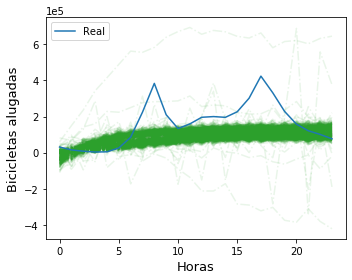

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_bike_sextas_crnngan.iloc[i].values
    s = scaler.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 24, 1), s.flatten(), c="#2ca02c", alpha=0.1, ls='-.')
ax.plot(np.arange(0,24, 1), wk_real_sexta, label='Real')
ax.set_xlabel("Horas", fontdict={'fontsize':13})
ax.set_ylabel("Bicicletas alugadas", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/bikesharing/bike_crnngan.pdf")

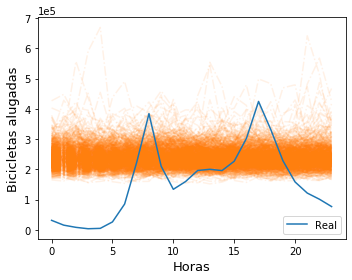

In [13]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_bike_sextas_arima.iloc[i].values
#     s = scaler.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 24, 1), s.flatten(), c="#ff7f0e", alpha=0.1, ls='-.')
ax.plot(np.arange(0,24, 1), wk_real_sexta, label='Real')
ax.set_xlabel("Horas", fontdict={'fontsize':13})
ax.set_ylabel("Bicicletas alugadas", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/bikesharing/bike_arima.pdf")

#### Rua I

In [6]:
rI = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")
scaler_rI = MinMaxScaler().fit(rI.reshape(-1,1))

In [7]:
list_dates_bike = p.get_list_dates(12000, 2019,3,28, timedelta(minutes=30))
df_real_rI = p.get_df(list_dates_bike,rI.reshape(250, 48, 1),w=48)
wk_real_sexta_rI = r.get_count(df_real_rI,4,48)

In [8]:
df_rI_sextas_timegan = pd.read_csv("dfs_somas/Rua I/df_rua_I_sextas_timegan.csv", index_col=0)
df_rI_sextas_rgan    = pd.read_csv("dfs_somas/Rua I/df_rua_I_sextas_rgan.csv", index_col=0)
df_rI_sextas_crnngan = pd.read_csv("dfs_somas/Rua I/df_rua_I_sextas_crnngan.csv", index_col=0)
# df_rI_sextas_arima   = pd.read_csv("sum_all_samples/bikesharing/df_bike_sextas_arima.csv", index_col=0)

In [9]:
df_rI_sextas_arima   = pd.read_csv("dfs_somas/Rua I/df_rua_I_sextas.csv", index_col=0)

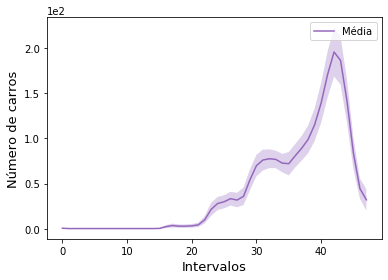

In [12]:
stds_rI_timegan = df_rI_sextas_timegan.std(axis=0)

means_rI_timegan = df_rI_sextas_timegan.mean(axis=0)

save_shaded_mean_std(means_rI_timegan, stds_rI_timegan, 
                     scaler_s=scaler_rI, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='bike_rI_media.pdf', sci=True)

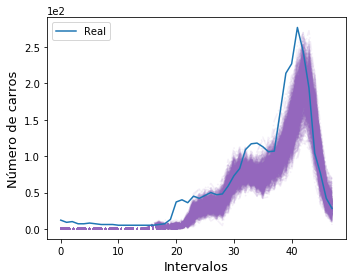

In [72]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rI_sextas_timegan.iloc[i].values
    s = scaler_rI.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['timegan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rI, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rI/rI_timegan.pdf")

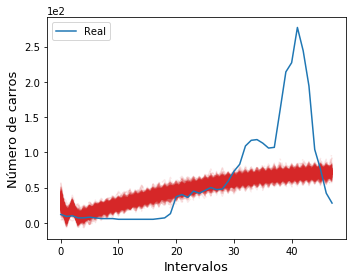

In [73]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rI_sextas_rgan.iloc[i].values
    s = scaler_rI.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['rgan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rI, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rI/rI_rgan.pdf")

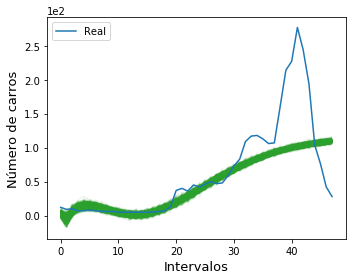

In [74]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rI_sextas_crnngan.iloc[i].values
    s = scaler_rI.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['crnngan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rI, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rI/rI_crnngan.pdf")

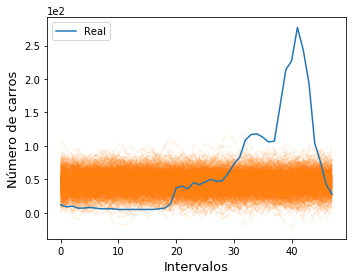

In [91]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rI_sextas_arima.iloc[i].values
#     s = scaler_rI.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['arima'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rI, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rI/rI_arima.pdf")

#### Rua II

In [13]:
rII = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")
scaler_rII = MinMaxScaler().fit(rII.reshape(-1,1))

In [14]:
list_dates_rII = p.get_list_dates(11040, 2019, 4, 17, timedelta(minutes=30))
df_real_rII = p.get_df(list_dates_rII,rII.reshape(230, 48, 1),w=48)
wk_real_sexta_rII = r.get_count(df_real_rII,4,48)

In [15]:
df_rII_sextas_timegan = pd.read_csv("dfs_somas/Rua II/df_rua_II_sextas_timegan.csv", index_col=0)
df_rII_sextas_rgan    = pd.read_csv("dfs_somas/Rua II/df_rua_II_sextas_rgan.csv", index_col=0)
df_rII_sextas_crnngan = pd.read_csv("dfs_somas/Rua II/df_rua_II_sextas_crnngan.csv", index_col=0)
df_rII_sextas_arima   = pd.read_csv("dfs_somas/Rua II/df_rua_II_sextas_arima.csv", index_col=0)

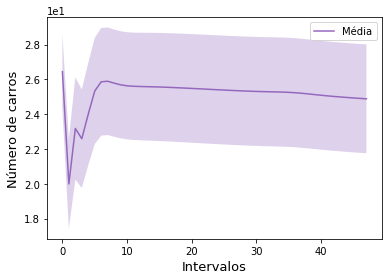

In [16]:
stds_rII_timegan = df_rII_sextas_timegan.std(axis=0)

means_rII_timegan = df_rII_sextas_timegan.mean(axis=0)

save_shaded_mean_std(means_rII_timegan, stds_rII_timegan, 
                     scaler_s=scaler_rII, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='bike_rII_media.pdf', sci=True)

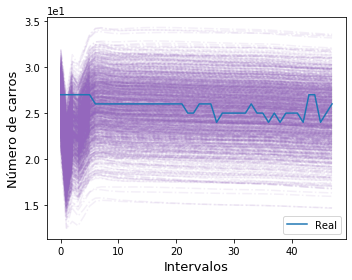

In [78]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rII_sextas_timegan.iloc[i].values
    s = scaler_rII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['timegan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rII/rII_timegan.pdf")

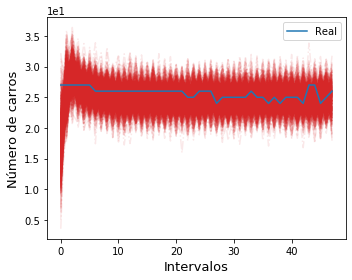

In [79]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rII_sextas_rgan.iloc[i].values
    s = scaler_rII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['rgan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rII/rII_rgan.pdf")

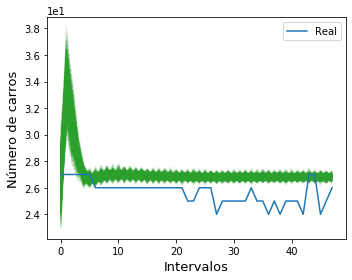

In [80]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rII_sextas_crnngan.iloc[i].values
    s = scaler_rII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['crnngan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rII/rII_crnngan.pdf")

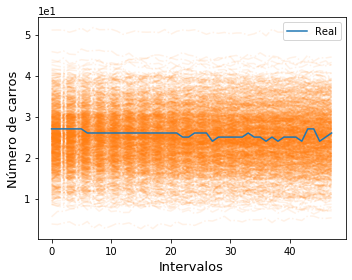

In [81]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rII_sextas_arima.iloc[i].values
#     s = scaler_rII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['arima'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rII/rII_arima.pdf")

#### Rua III

In [17]:
rIII = np.load("datasets/002_Av. Norte Sul_30min.npy")
scaler_rIII = MinMaxScaler().fit(rIII.reshape(-1,1))

In [18]:
list_dates_rIII = p.get_list_dates(12336, 2019, 3, 21, timedelta(minutes=30))
df_real_rIII = p.get_df(list_dates_rIII,rIII.reshape(257, 48, 1),w=48)
wk_real_sexta_rIII = r.get_count(df_real_rIII,4,48)

In [19]:
df_rIII_sextas_timegan = pd.read_csv("dfs_somas/Rua III/df_rua_III_sextas_timegan.csv", index_col=0)
df_rIII_sextas_rgan    = pd.read_csv("dfs_somas/Rua III/df_rua_III_sextas_rgan.csv", index_col=0)
df_rIII_sextas_crnngan = pd.read_csv("dfs_somas/Rua III/df_rua_III_sextas_crnngan.csv", index_col=0)
df_rIII_sextas_arima   = pd.read_csv("dfs_somas/Rua III/df_rua_III_sextas_arima.csv", index_col=0)

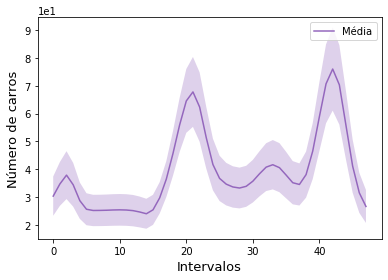

In [20]:
stds_rIII_timegan = df_rIII_sextas_timegan.std(axis=0)

means_rIII_timegan = df_rIII_sextas_timegan.mean(axis=0)

save_shaded_mean_std(means_rIII_timegan, stds_rIII_timegan, 
                     scaler_s=scaler_rIII, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='bike_rIII_media.pdf', sci=True)

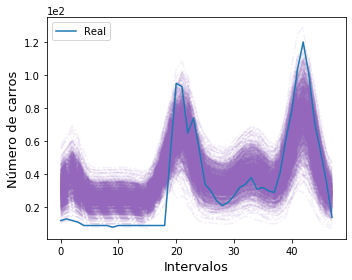

In [85]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rIII_sextas_timegan.iloc[i].values
    s = scaler_rIII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['timegan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rIII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rIII/rIII_timegan.pdf")

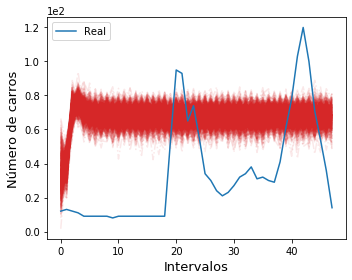

In [86]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rIII_sextas_rgan.iloc[i].values
    s = scaler_rIII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['rgan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rIII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rIII/rIII_rgan.pdf")

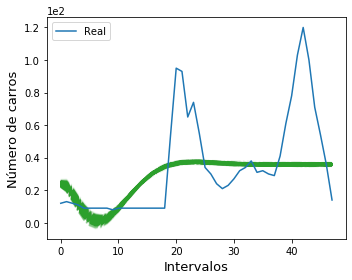

In [66]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rIII_sextas_crnngan.iloc[i].values
    s = scaler_rIII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['crnngan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rIII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rIII/rIII_crnngan.pdf")

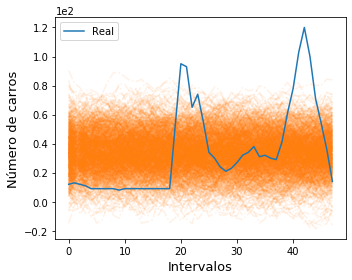

In [67]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_rIII_sextas_arima.iloc[i].values
#     s = scaler_rIII.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['arima'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_rIII, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/rIII/rIII_arima.pdf")

#### Ruas 4 - 8

In [33]:
def save_shaded(df, wk_real, scaler=None, path="", cor=''):
    fig, ax = plt.subplots(figsize=(5,4))
    for i in range(1000):
        s = df.iloc[i].values
        s = scaler.inverse_transform(s.reshape(-1,1))    
        ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores[cor], alpha=0.1, ls='-.')
    ax.plot(np.arange(0, 48, 1), wk_real, label='Real')
    ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
    ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots/sum_dfs_all/{}.pdf".format(path))

def save_shaded_mean_std(sample, std, cor, w, scaler_s=None, xlabel='', ylabel='', path='', sci=False):
    fig, ax = plt.subplots(figsize=(5.5,4))
    
    #     sample = scaler_s.inverse_transform(np.array(sample).reshape(-1,1))
    #     std = scaler_s.inverse_transform(np.array(std).reshape(-1,1))
#     sample = np.exp(np.array(sample))
#     std = np.exp(np.array(std))
    
    sample = np.array(sample)
    std = np.array(std)
    ax.plot(sample.flatten(), c=cor, label='Média')
    ax.fill_between(np.arange(0,w,1), sample-std, sample+std, alpha=0.3, facecolor=cor)
    ax.set_xlabel(xlabel, fontdict={'fontsize':13})
    ax.set_ylabel(ylabel, fontdict={'fontsize':13})
    if sci:
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend()
    plt.tight_layout()
    plt.savefig("plots/sum_dfs_all/{}".format(path))

In [2]:
r48 = np.load("datasets/data_rua_4_8_unscaled.npy", allow_pickle=True)
scaler_r48 = MinMaxScaler().fit(r48.reshape(-1,1))

In [3]:
# list_dates_r48 = p.get_list_dates(12336, 2019, 3, 21, timedelta(minutes=30))
list_dates_r48 = p.get_list_dates(12000,2019,3,28,timedelta(minutes=30))
# df_real_rIII = p.get_df(list_dates_rIII,rIII.reshape(257, 48, 1),w=48)
# wk_real_sexta_rIII = r.get_count(df_real_rIII,4,48)

**Rua 4**

In [4]:
r4 = r48[:, 0]
df_real_r4 = p.get_df(list_dates_r48,r4.reshape(250, 48, 1),w=48)
wk_real_sexta_r4 = r.get_count(df_real_r4,4,48)

In [5]:
df_r4_sextas_timegan = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_timegan.csv", index_col=0)
df_r4_sextas_rgan = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_rgan.csv", index_col=0)
df_r4_sextas_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/4/df_rua4_sextas_crnngan.csv", index_col=0)

In [8]:
mean_r4_timegan = df_r4_sextas_timegan.mean(axis=0)
mean_r4_rgan = df_r4_sextas_rgan.mean(axis=0)
mean_r4_crnngan = df_r4_sextas_crnngan.mean(axis=0)

std_r4_timegan = df_r4_sextas_timegan.std(axis=0)
std_r4_rgan = df_r4_sextas_rgan.std(axis=0)
std_r4_crnngan = df_r4_sextas_crnngan.std(axis=0)

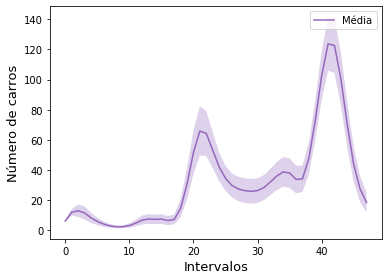

In [25]:
save_shaded_mean_std(mean_r4_timegan, std_r4_timegan, 
                     scaler_s=scaler_r48, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r4_timegan_media.pdf')

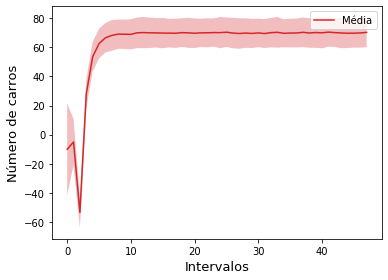

In [26]:
save_shaded_mean_std(mean_r4_rgan, std_r4_rgan, 
                     scaler_s=scaler_r48, cor=cores['rgan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r4_rgan_media.pdf')

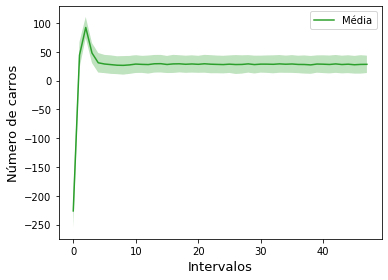

In [27]:
save_shaded_mean_std(mean_r4_crnngan, std_r4_crnngan, 
                     scaler_s=scaler_r48, cor=cores['crnngan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r4_crnngan_media.pdf')

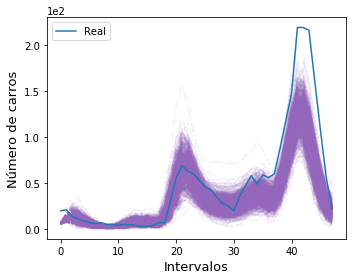

In [27]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_r4_sextas_timegan.iloc[i].values
    s = scaler_r48.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['timegan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_r4, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/r4/r4_timegan.pdf")

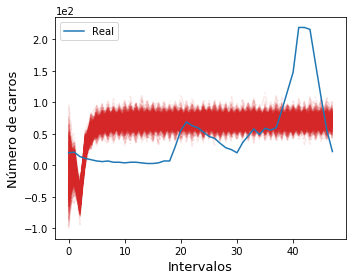

In [29]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_r4_sextas_rgan.iloc[i].values
    s = scaler_r48.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['rgan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_r4, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/r4/r4_rgan.pdf")

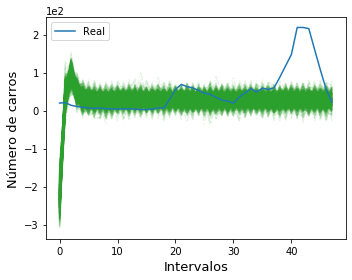

In [30]:
fig, ax = plt.subplots(figsize=(5,4))
for i in range(1000):
    s = df_r4_sextas_crnngan.iloc[i].values
    s = scaler_r48.inverse_transform(s.reshape(-1,1))    
    ax.plot(np.arange(0, 48, 1), s.flatten(), c=cores['crnngan'], alpha=0.1, ls='-.')
ax.plot(np.arange(0, 48, 1), wk_real_sexta_r4, label='Real')
ax.set_xlabel("Intervalos", fontdict={'fontsize':13})
ax.set_ylabel("Número de carros", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig("plots/sum_dfs_all/r4/crnngan.pdf")

**Rua 5**

In [28]:
r5 = r48[:, 1]
df_real_r5 = p.get_df(list_dates_r48,r5.reshape(250, 48, 1),w=48)
wk_real_sexta_r5 = r.get_count(df_real_r5,4,48)

In [30]:
df_r5_sextas_timegan = pd.read_csv("sum_all_samples/ruas_4_8/5/df_rua5_sextas_timegan.csv", index_col=0)
df_r5_sextas_rgan = pd.read_csv("sum_all_samples/ruas_4_8/5/df_rua5_sextas_rgan.csv", index_col=0)
df_r5_sextas_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/5/df_rua5_sextas_crnngan.csv", index_col=0)

In [31]:
mean_r5_timegan = df_r5_sextas_timegan.mean(axis=0)
mean_r5_rgan = df_r5_sextas_rgan.mean(axis=0)
mean_r5_crnngan = df_r5_sextas_crnngan.mean(axis=0)

std_r5_timegan = df_r5_sextas_timegan.std(axis=0)
std_r5_rgan = df_r5_sextas_rgan.std(axis=0)
std_r5_crnngan = df_r5_sextas_crnngan.std(axis=0)

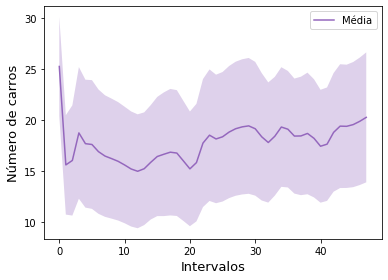

In [33]:
save_shaded_mean_std(mean_r5_timegan, std_r5_timegan, 
                     scaler_s=scaler_r48, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r5_timegan_media.pdf')

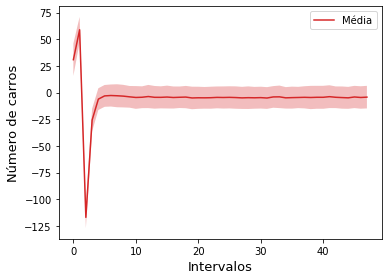

In [32]:
save_shaded_mean_std(mean_r5_rgan, std_r5_rgan, 
                     scaler_s=scaler_r48, cor=cores['rgan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r5_rgan_media.pdf')

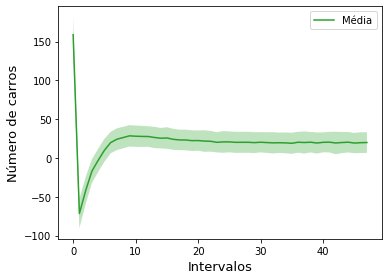

In [34]:
save_shaded_mean_std(mean_r5_crnngan, std_r5_crnngan, 
                     scaler_s=scaler_r48, cor=cores['crnngan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r5_crnngan_media.pdf')

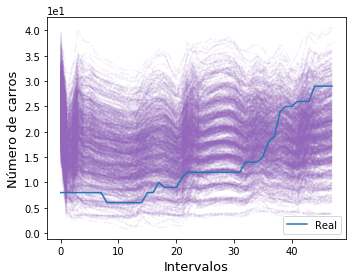

In [36]:
save_shaded(df_r5_sextas_timegan, wk_real_sexta_r5, scaler=scaler_r48, path="r5/r5_timegan", cor='timegan')

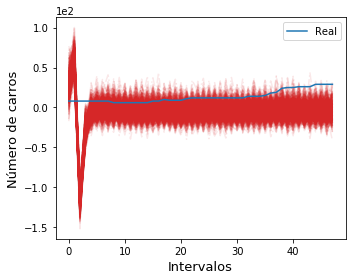

In [38]:
save_shaded(df_r5_sextas_rgan, wk_real_sexta_r5, scaler=scaler_r48, path="r5/r5_rgan", cor='rgan')

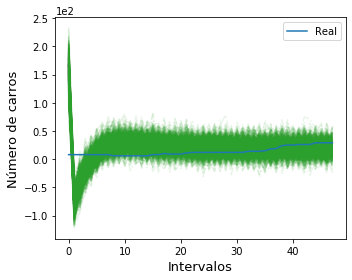

In [39]:
save_shaded(df_r5_sextas_crnngan, wk_real_sexta_r5, scaler=scaler_r48, path="r5/r5_crnngan", cor='crnngan')

**Rua 6**

In [35]:
r6 = r48[:, 2]
df_real_r6 = p.get_df(list_dates_r48,r6.reshape(250, 48, 1),w=48)
wk_real_sexta_r6 = r.get_count(df_real_r6,4,48)

In [36]:
df_r6_sextas_timegan = pd.read_csv("sum_all_samples/ruas_4_8/6/df_rua6_sextas_timegan.csv", index_col=0)
df_r6_sextas_rgan = pd.read_csv("sum_all_samples/ruas_4_8/6/df_rua6_sextas_rgan.csv", index_col=0)
df_r6_sextas_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/6/df_rua6_sextas_crnngan.csv", index_col=0)

In [38]:
mean_r6_timegan = df_r6_sextas_timegan.mean(axis=0)
mean_r6_rgan = df_r6_sextas_rgan.mean(axis=0)
mean_r6_crnngan = df_r6_sextas_crnngan.mean(axis=0)

std_r6_timegan = df_r6_sextas_timegan.std(axis=0)
std_r6_rgan = df_r6_sextas_rgan.std(axis=0)
std_r6_crnngan = df_r6_sextas_crnngan.std(axis=0)

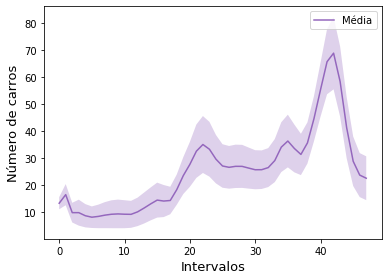

In [39]:
save_shaded_mean_std(mean_r6_timegan, std_r6_timegan, 
                     scaler_s=scaler_r48, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r6_timegan_media.pdf')

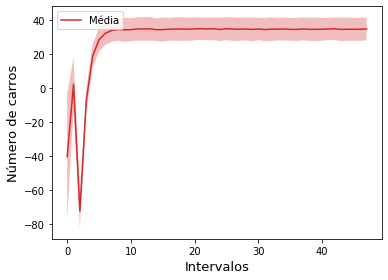

In [40]:
save_shaded_mean_std(mean_r6_rgan, std_r6_rgan, 
                     scaler_s=scaler_r48, cor=cores['rgan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r6_rgan_media.pdf')

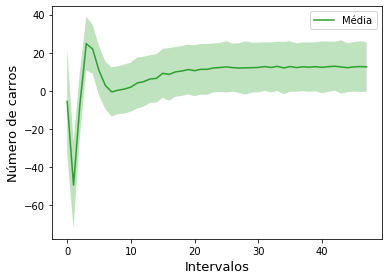

In [44]:
save_shaded_mean_std(mean_r6_crnngan, std_r6_crnngan, 
                     scaler_s=scaler_r48, cor=cores['crnngan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r6_crnngan_media.pdf')

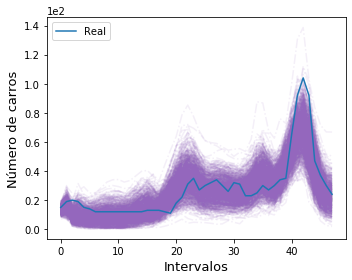

In [42]:
save_shaded(df_r6_sextas_timegan, wk_real_sexta_r6, scaler=scaler_r48, path="r6/r6_timegan", cor='timegan')

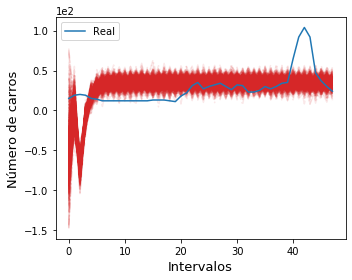

In [43]:
save_shaded(df_r6_sextas_rgan, wk_real_sexta_r6, scaler=scaler_r48, path="r6/r6_rgan", cor='rgan')

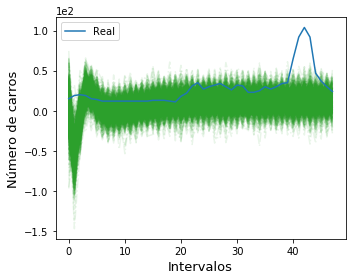

In [44]:
save_shaded(df_r6_sextas_crnngan, wk_real_sexta_r6, scaler=scaler_r48, path="r6/r6_crnngan", cor='crnngan')

**Rua 7**

In [41]:
r7 = r48[:, 3]
df_real_r7 = p.get_df(list_dates_r48,r7.reshape(250, 48, 1), w=48)
wk_real_sexta_r7 = r.get_count(df_real_r7,4,48)

In [42]:
df_r7_sextas_timegan = pd.read_csv("sum_all_samples/ruas_4_8/7/df_rua7_sextas_timegan.csv", index_col=0)
df_r7_sextas_rgan = pd.read_csv("sum_all_samples/ruas_4_8/7/df_rua7_sextas_rgan.csv", index_col=0)
df_r7_sextas_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/7/df_rua7_sextas_crnngan.csv", index_col=0)

In [43]:
mean_r7_timegan = df_r7_sextas_timegan.mean(axis=0)
mean_r7_rgan = df_r7_sextas_rgan.mean(axis=0)
mean_r7_crnngan = df_r7_sextas_crnngan.mean(axis=0)

std_r7_timegan = df_r7_sextas_timegan.std(axis=0)
std_r7_rgan = df_r7_sextas_rgan.std(axis=0)
std_r7_crnngan = df_r7_sextas_crnngan.std(axis=0)

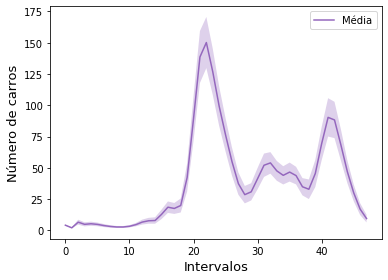

In [45]:
save_shaded_mean_std(mean_r7_timegan, std_r7_timegan, 
                     scaler_s=scaler_r48, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r7_timegan_media.pdf')

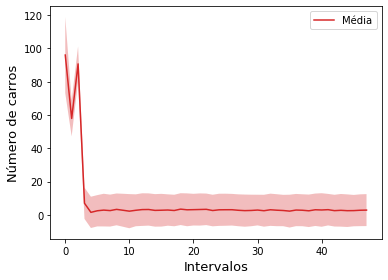

In [46]:
save_shaded_mean_std(mean_r7_rgan, std_r7_rgan, 
                     scaler_s=scaler_r48, cor=cores['rgan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r7_rgan_media.pdf')

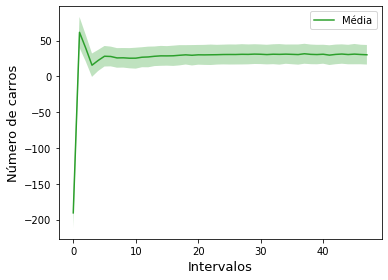

In [47]:
save_shaded_mean_std(mean_r7_crnngan, std_r7_crnngan, 
                     scaler_s=scaler_r48, cor=cores['crnngan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r7_crnngan_media.pdf')

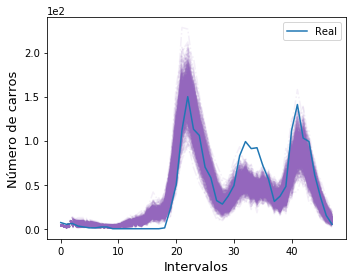

In [47]:
save_shaded(df_r7_sextas_timegan, wk_real_sexta_r7, scaler=scaler_r48, path="r7/r7_timegan", cor='timegan')

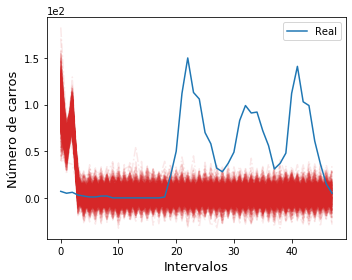

In [48]:
save_shaded(df_r7_sextas_rgan, wk_real_sexta_r7, scaler=scaler_r48, path="r7/r7_rgan", cor='rgan')

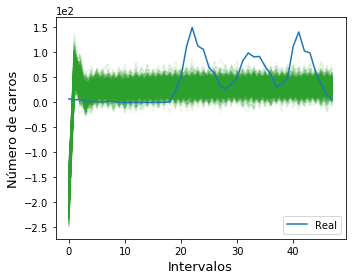

In [49]:
save_shaded(df_r7_sextas_crnngan,  wk_real_sexta_r7, scaler=scaler_r48, path="r7/r7_crnngan", cor='crnngan')

**Rua 8**

In [48]:
r8 = r48[:, 4]
df_real_r8 = p.get_df(list_dates_r48,r8.reshape(250, 48, 1), w=48)
wk_real_sexta_r8 = r.get_count(df_real_r8,4,48)

In [49]:
df_r8_sextas_timegan = pd.read_csv("sum_all_samples/ruas_4_8/8/df_rua8_sextas_timegan.csv", index_col=0)
df_r8_sextas_rgan = pd.read_csv("sum_all_samples/ruas_4_8/8/df_rua8_sextas_rgan.csv", index_col=0)
df_r8_sextas_crnngan = pd.read_csv("sum_all_samples/ruas_4_8/8/df_rua8_sextas_crnngan.csv", index_col=0)

In [50]:
mean_r8_timegan = df_r8_sextas_timegan.mean(axis=0)
mean_r8_rgan = df_r8_sextas_rgan.mean(axis=0)
mean_r8_crnngan = df_r8_sextas_crnngan.mean(axis=0)

std_r8_timegan = df_r8_sextas_timegan.std(axis=0)
std_r8_rgan = df_r8_sextas_rgan.std(axis=0)
std_r8_crnngan = df_r8_sextas_crnngan.std(axis=0)

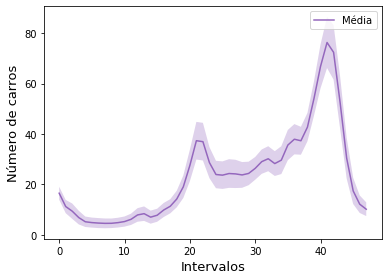

In [51]:
save_shaded_mean_std(mean_r8_timegan, std_r8_timegan, 
                     scaler_s=scaler_r48, cor=cores['timegan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r8_timegan_media.pdf')

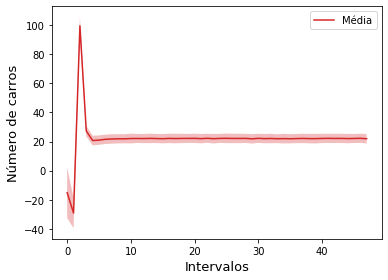

In [52]:
save_shaded_mean_std(mean_r8_rgan, std_r8_rgan, 
                     scaler_s=scaler_r48, cor=cores['rgan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r8_rgan_media.pdf')

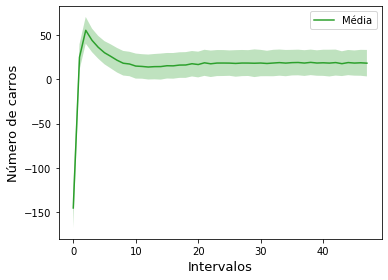

In [53]:
save_shaded_mean_std(mean_r8_crnngan, std_r8_crnngan, 
                     scaler_s=scaler_r48, cor=cores['crnngan'],
                     w=48, xlabel='Intervalos', ylabel='Número de carros',
                     path='r8_crnngan_media.pdf')

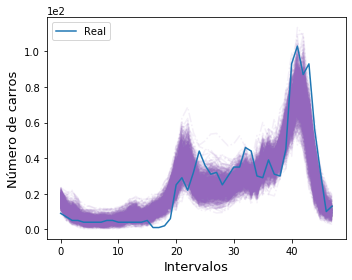

In [53]:
save_shaded(df_r8_sextas_timegan, wk_real_sexta_r8, scaler=scaler_r48, path="r8/r8_timegan", cor='timegan')

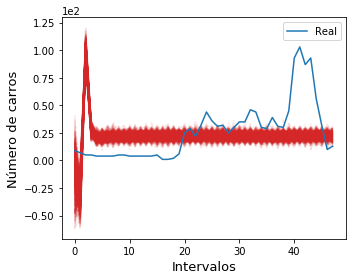

In [54]:
save_shaded(df_r8_sextas_rgan, wk_real_sexta_r8, scaler=scaler_r48, path="r8/r8_rgan", cor='rgan')

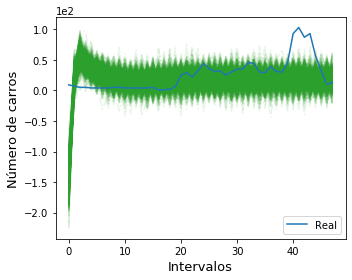

In [55]:
save_shaded(df_r8_sextas_crnngan, wk_real_sexta_r8, scaler=scaler_r48, path="r8/r8_crnngan", cor='crnngan')

### Rua I

In [57]:
list_wks_timegan = get_list_wks(timegan_samples, rua_I, list_dates_rI, 48)

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [63]:
list_wks_rgan = get_list_wks(rgan_samples, rua_I, list_dates_rI, 48)

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [74]:
list_wks_rgan = get_list_wks(crnngan_samples, rua_I, list_dates_rI, 48)

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


[Link](https://stackoverflow.com/questions/43064524/plotting-shaded-uncertainty-region-in-line-plot-in-matplotlib-when-data-has-nans)

In [48]:
df_ruaI_sextas = pd.DataFrame(list_wks, columns=columns_df)
df_ruaI_sextas.to_csv("df_rua_I_sextas.csv")

In [58]:
df_ruaI_sextas_timegan = pd.DataFrame(list_wks_timegan, columns=columns_df)

In [71]:
df_ruaI_sextas_rgan = pd.DataFrame(list_wks_rgan, columns=columns_df)

In [75]:
df_ruaI_sextas_crnngan = pd.DataFrame(list_wks_rgan, columns=columns_df)

In [60]:
df_ruaI_sextas_timegan.to_csv("df_rua_I_sextas_timegan.csv")

In [72]:
df_ruaI_sextas_rgan.to_csv("df_rua_I_sextas_rgan.csv")

In [76]:
df_ruaI_sextas_crnngan.to_csv("df_rua_I_sextas_crnngan.csv")

In [69]:
#arima_r0 = np.exp(arima_r0)
arima_r0 = s0.reshape(rua_I.shape)

In [15]:
scaler_r0 = MinMaxScaler().fit(rua_I.reshape(-1,1))

In [19]:
rua_I_shp = (250, 48, 1)
timegan_r0 = scaler_r0.inverse_transform(s1.reshape(-1,1))
timegan_r0 = timegan_r0.reshape(rua_I_shp)

rgan_r0 = scaler_r0.inverse_transform(s2.reshape(-1,1))
rgan_r0 = rgan_r0.reshape(rua_I_shp)

crnn_r0 = scaler_r0.inverse_transform(s3.reshape(-1,1))
crnn_r0 = crnn_r0.reshape(rua_I_shp)

In [81]:
df_ruaI_sextas_timegan[:1].values[0].shape

(48,)

In [82]:
t0 = scaler_r0.inverse_transform(df_ruaI_sextas_timegan[:1].values[0].reshape(-1,1))

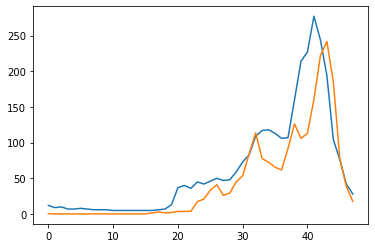

In [83]:
plt.plot(wk_r)
plt.plot(t0.reshape(48))

In [24]:
df_timegan = p.get_df(list_dates_rI,timegan_r0,w=48)
df_arima =   p.get_df(list_dates_rI,arima_r0.reshape(250, 48, 1),w=48)
df_rgan =    p.get_df(list_dates_rI,rgan_r0,w=48)
df_crnn =    p.get_df(list_dates_rI,crnn_r0,w=48)

In [23]:
timegan_r0.shape

(250, 48, 1)

### Sexta

In [11]:
labels = ["ARIMA", "C-RNN-GAN", "RGAN", "TimeGAN"]

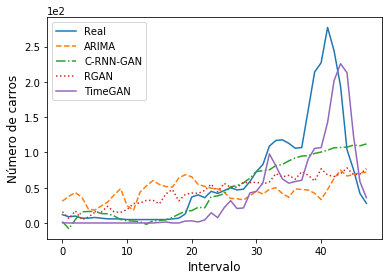

In [25]:
wk_real_0 = r.get_count(df_rI,4,48)
plot_sum(wk_real_0,[df_arima, df_crnn, df_rgan, df_timegan],"rua_I",4,labels=labels,
         linestyles=['--','-.',':','-'], interval=48,loc_leg='upper left',xlabel="Intervalo", ylabel="Número de carros")

### Seg

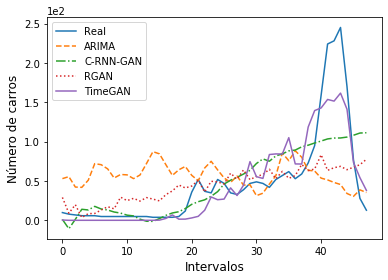

In [26]:
wk_real_0_seg = r.get_count(df_rI,0,48)
plot_sum(wk_real_0_seg,[df_arima, df_crnn, df_rgan, df_timegan],"rua_I_seg",0,labels=labels,
         linestyles=['--','-.',':','-'], interval=48, loc_leg="upper left", xlabel="Intervalos", ylabel="Número de carros")

### Qua

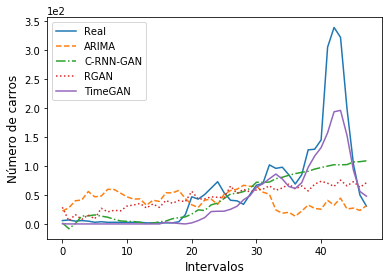

In [27]:
day = 2
wk_real_0_qua = r.get_count(df_rI,day,48)
plot_sum(wk_real_0_qua,[df_arima, df_crnn, df_rgan, df_timegan], "rua_I_qua",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, loc_leg="upper left",xlabel="Intervalos", ylabel="Número de carros")

### Sab

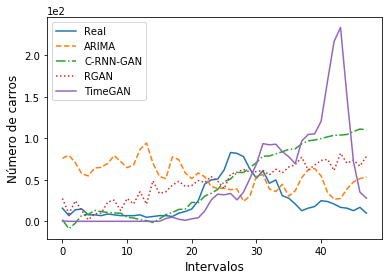

In [28]:
day = 5
wk_real_0_sab = r.get_count(df_rI,day,48)
plot_sum(wk_real_0_sab,[df_arima, df_crnn, df_rgan, df_timegan],"rua_I_sab",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, loc_leg="upper left",
         xlabel="Intervalos", ylabel="Número de carros")

### Rua II

In [29]:
fk_arima = np.load("arima/transito_vitoria/rua_II/samples/arima_r2_0.npy")
fk_crnngan = np.load("crnn/transito_vitoria/rua_II/samples_crnn_r001/sample_0_rua_II.npy")
fk_rgan = np.load("rgan/transito_vitoria/rua_II/samples/sample_0_rua_II.npy")
fk_timegan=np.load("timegan/transito_vitoria/rua_II/samples/sample_0_rua_II.npy")

In [30]:
fk_arima = fk_arima.reshape(rua_II.shape)
scaler_rII = MinMaxScaler().fit(rua_II.reshape(-1,1))

fk_timegan = scaler_rII.inverse_transform(fk_timegan.reshape(-1,1))
fk_timegan = fk_timegan.reshape(rua_II.shape)

fk_rgan = scaler_rII.inverse_transform(fk_rgan.reshape(-1,1))
fk_rgan = fk_rgan.reshape(rua_II.shape)

fk_crnngan = scaler_rII.inverse_transform(fk_crnngan.reshape(-1,1))
fk_crnngan = fk_crnngan.reshape(rua_II.shape)

In [31]:
df_timegan = r.get_df_real(list_dates_rII,fk_timegan,w=48)
df_arima = r.get_df_real(list_dates_rII,fk_arima,w=48)
df_rgan = r.get_df_real(list_dates_rII,fk_rgan,w=48)
df_crnn = r.get_df_real(list_dates_rII,fk_crnngan,w=48)

In [12]:
arima_samples_ruaII = glob("arima/transito_vitoria/rua_II/samples/*.npy")
timegan_samples_ruaII = glob("timegan/transito_vitoria/rua_II/samples/*.npy")
rgan_samples_ruaII = glob("rgan/transito_vitoria/rua_II/samples/*.npy")
crrngan_samples_ruaII = glob("crnn/transito_vitoria/rua_II/samples_crnn_r001/*.npy")

In [13]:
len(crrngan_samples_ruaII)

1000

In [89]:
list_wks_arima_ruaII = get_list_wks(arima_samples_ruaII,rua_II, list_dates_rII, 48)

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [91]:
df_ruaII_sextas_arima = pd.DataFrame(list_wks_arima_ruaII, columns=columns_df)
df_ruaII_sextas_arima.to_csv("df_rua_II_sextas_arima.csv")

In [93]:
list_wks_rgan_ruaII = get_list_wks(rgan_samples_ruaII, rua_II, list_dates_rII, 48)
df_ruaII_sextas_rgan = pd.DataFrame(list_wks_rgan_ruaII, columns=columns_df)
df_ruaII_sextas_rgan.to_csv("df_rua_II_sextas_rgan.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [94]:
list_wks_timegan_ruaII = get_list_wks(timegan_samples_ruaII, rua_II, list_dates_rII, 48)
df_ruaII_sextas_timegan = pd.DataFrame(list_wks_timegan_ruaII, columns=columns_df)
df_ruaII_sextas_timegan.to_csv("df_rua_II_sextas_timegan.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [16]:
list_wks_crnngan_ruaII = get_list_wks(crrngan_samples_ruaII, rua_II, list_dates_rII, 48)


Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


NameError: name 'columns_df' is not defined

In [19]:
df_ruaII_sextas_crnngan = pd.DataFrame(list_wks_crnngan_ruaII, columns=columns_df)
df_ruaII_sextas_crnngan.to_csv("df_rua_II_sextas_crnngan.csv")

### Sex

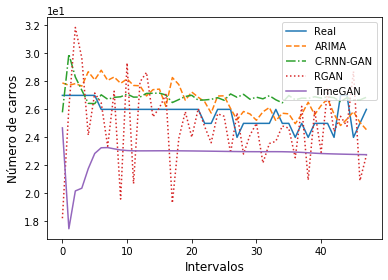

In [35]:
wk_real_II = r.get_count(df_rII,4,48)
plot_sum(wk_real_II,[df_arima, df_crnn, df_rgan, df_timegan],"rua_II_sex",4,
         labels=labels,linestyles=['--','-.',':','-'], interval=48,loc_leg='upper right', xlabel="Intervalos", ylabel="Número de carros")

### Seg

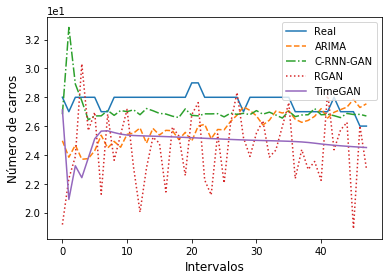

In [48]:
day = 0
wk_real_II_seg = r.get_count(df_rII,day,48)
plot_sum(wk_real_II_seg,[df_arima, df_crnn, df_rgan, df_timegan],"rua_II_seg",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48,loc_leg='upper right',
         xlabel="Intervalos", ylabel="Número de carros")

### Qua

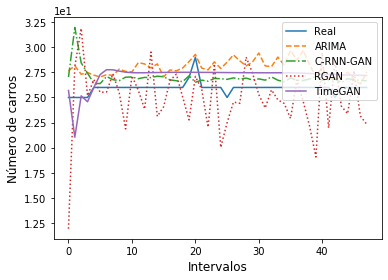

In [49]:
day = 2
wk_real_II_qua = r.get_count(df_rII,day,48)
plot_sum(wk_real_II_qua,[df_arima, df_crnn, df_rgan, df_timegan],"rua_II_qua",day,labels=labels,
         linestyles=['--','-.',':','-'], interval=48,loc_leg='upper right', ylabel="Número de carros", xlabel='Intervalos')

### Sab

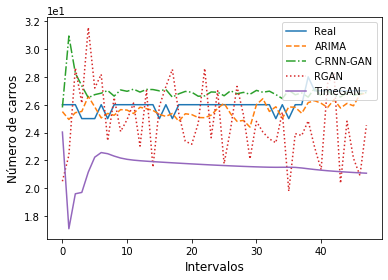

In [50]:
day = 5
wk_real_II_sab = r.get_count(df_rII,day,48)
plot_sum(wk_real_II_sab,[df_arima, df_crnn, df_rgan, df_timegan],"rua_II_sab",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48,loc_leg='upper right', xlabel="Intervalos", ylabel="Número de carros")

### Rua III

In [39]:
fk_arima_III = np.load("arima/transito_vitoria/rua_III/samples/arima_r3_0.npy")
fk_crnngan_III = np.load("crnn/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")
fk_rgan_III = np.load("rgan/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")
fk_timegan_III=np.load("timegan/transito_vitoria/rua_III/samples/sample_0_rua_III.npy")

In [20]:
arima_samples_ruaIII = glob("arima/transito_vitoria/rua_III/samples/*.npy")
timegan_samples_ruaIII = glob("timegan/transito_vitoria/rua_III/samples/*.npy")
rgan_samples_ruaIII = glob("rgan/transito_vitoria/rua_III/samples/*.npy")
crrngan_samples_ruaIII = glob("crnn/transito_vitoria/rua_III/samples/*.npy")
print (len(arima_samples_ruaIII), len(timegan_samples_ruaIII), len(rgan_samples_ruaIII), len(crrngan_samples_ruaIII))

1000 1000 1001 1000


In [21]:
list_wks_arima_ruaIII = get_list_wks(arima_samples_ruaIII, rua_III, list_dates_rIII, 48)
df_ruaIII_sextas_arima = pd.DataFrame(list_wks_arima_ruaIII, columns=columns_df)
df_ruaIII_sextas_arima.to_csv("df_rua_III_sextas_arima.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [22]:
list_wks_rgan_ruaIII = get_list_wks(rgan_samples_ruaIII, rua_III, list_dates_rIII, 48)
df_ruaIII_sextas_rgan = pd.DataFrame(list_wks_rgan_ruaIII, columns=columns_df)
df_ruaIII_sextas_rgan.to_csv("df_rua_III_sextas_rgan.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!
Done 1000!


In [23]:
list_wks_timegan_ruaIII = get_list_wks(timegan_samples_ruaIII, rua_III, list_dates_rIII, 48)
df_ruaIII_sextas_timegan = pd.DataFrame(list_wks_timegan_ruaIII, columns=columns_df)
df_ruaIII_sextas_timegan.to_csv("df_rua_III_sextas_timegan.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [24]:
list_wks_crnngan_ruaIII = get_list_wks(crrngan_samples_ruaIII, rua_III, list_dates_rIII, 48)
df_ruaIII_sextas_timegan = pd.DataFrame(list_wks_crnngan_ruaIII, columns=columns_df)
df_ruaIII_sextas_timegan.to_csv("df_rua_III_sextas_crnngan.csv")

Done 0!
Done 50!
Done 100!
Done 150!
Done 200!
Done 250!
Done 300!
Done 350!
Done 400!
Done 450!
Done 500!
Done 550!
Done 600!
Done 650!
Done 700!
Done 750!
Done 800!
Done 850!
Done 900!
Done 950!


In [41]:
fk_arima_III = fk_arima_III.reshape(rua_III.shape)

scaler_rIII = MinMaxScaler().fit(rua_III.reshape(-1,1))
fk_timegan_III = scaler_rIII.inverse_transform(fk_timegan_III.reshape(-1,1))
fk_timegan_III = fk_timegan_III.reshape(rua_III.shape)

fk_rgan_III = scaler_rIII.inverse_transform(fk_rgan_III.reshape(-1,1))
fk_rgan_III = fk_rgan_III.reshape(rua_III.shape)

fk_crnngan_III = scaler_rIII.inverse_transform(fk_crnngan_III.reshape(-1,1))
fk_crnngan_III = fk_crnngan_III.reshape(rua_III.shape)

In [42]:
df_timegan_III = r.get_df_real(list_dates_rIII,fk_timegan_III,w=48)
df_arima_III = r.get_df_real(list_dates_rIII,fk_arima_III,w=48)
df_rgan_III = r.get_df_real(list_dates_rIII,fk_rgan_III,w=48)
df_crnn_III = r.get_df_real(list_dates_rIII,fk_crnngan_III,w=48)

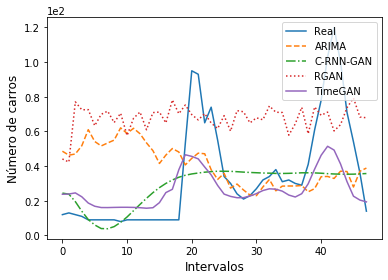

In [43]:
wk_real_III = r.get_count(df_rIII,4,48)
plot_sum(wk_real_III,[df_arima_III, df_crnn_III, df_rgan_III, df_timegan_III],"rua_III_sex",4,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, xlabel="Intervalos", ylabel="Número de carros")

### Seg

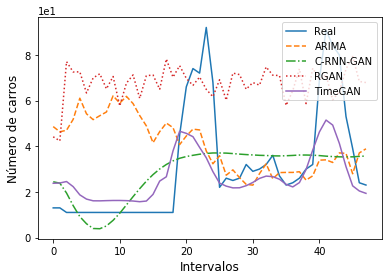

In [44]:
wk_real_III_seg = r.get_count(df_rIII,0,48)
plot_sum(wk_real_III_seg,[df_arima_III, df_crnn_III, df_rgan_III, df_timegan_III],"rua_III_seg",4,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, xlabel="Intervalos",ylabel="Número de carros")

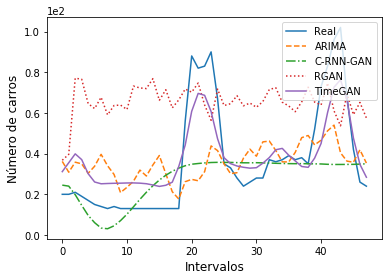

In [51]:
day = 2
wk_real_III_qua = r.get_count(df_rIII,day,48)
plot_sum(wk_real_III_qua,[df_arima_III, df_crnn_III, df_rgan_III, df_timegan_III],"rua_III_qua",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, xlabel="Intervalos",ylabel="Número de carros")

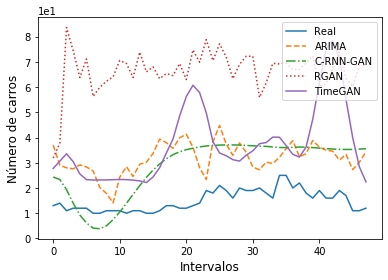

In [52]:
day = 5
wk_real_III_sab = r.get_count(df_rIII,day,48)
plot_sum(wk_real_III_sab,[df_arima_III, df_crnn_III, df_rgan_III, df_timegan_III],"rua_III_sab",day,
         labels=labels,linestyles=['--','-.',':','-'], interval=48, xlabel="Intervalos", ylabel="Número de carros")

In [ ]:
path = "rgan/waze/test1/"

In [84]:
s0[s0<0] = 0.0
s1[s1<0] = 0.0
s2[s2<0] = 0.0
s3[s3<0] = 0.0

s1 = s1[:len(rua_000)]
s2 = s2[:len(rua_000)]
s3 = s3[:len(rua_000)]

In [85]:
s1 = scaler.inverse_transform(s1.reshape(-1,1))
s1 = s1.reshape(rua_000.shape)

s2 = scaler.inverse_transform(s2.reshape(-1,1))
s2 = s2.reshape(rua_000.shape)

s3 = scaler.inverse_transform(s3.reshape(-1,1))
s3 = s3.reshape(rua_000.shape)

In [86]:
df_s0 = p.get_df_fake(s0,list_dates)
df_s1 = p.get_df_fake(s1,list_dates)
df_s2 = p.get_df_fake(s2,list_dates)
df_s3 = p.get_df_fake(s3,list_dates)

In [77]:
wk_real_0 = p.get_count(df_000,4,48)
plot_sum(wk_real_0,[df_s0, df_s1, df_s2, df_s3],"t",4,labels=['arima','timegan', 'rgan', 'c-rnn-gan'],linestyles=['--','-.',':','-'], interval=48)

# Variabilidade

## Bikesharing

In [2]:
bikesharing = np.load("datasets/bike_sharing_2012to2019_inputed.npy")

In [36]:
max(bikesharing.flatten())

2037

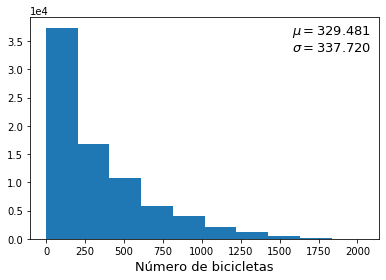

In [41]:
fig, ax = plt.subplots(figsize=(5.5,4))
ax.hist(bikesharing.flatten())
ax.set_xlabel("Número de bicicletas", fontdict={'fontsize':13})
ax.set_ylabel("", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.text(1580, 33112.0, r"$\mu=329.481$"+ "\n" + r"$\sigma=337.720$", fontdict={'fontsize':13})
plt.tight_layout()
plt.savefig("plots/hist_bikesharing.pdf")
plt.show()

In [4]:
ax.hist(bikesharing.flatten())

(array([3.7312e+04, 1.6819e+04, 1.0807e+04, 5.7830e+03, 4.0480e+03,
        2.1340e+03, 1.1870e+03, 5.5400e+02, 2.1100e+02, 3.3000e+01]),
 array([   0. ,  203.7,  407.4,  611.1,  814.8, 1018.5, 1222.2, 1425.9,
        1629.6, 1833.3, 2037. ]),
 <a list of 10 Patch objects>)

In [44]:
3.7312e+04

37312.0

In [18]:
2037, 37312.0

33.0

In [36]:
print ("mean: {:.3f}, std: {:.3f}".format(bikesharing.mean(), bikesharing.std()))

mean: 329.481, std: 337.720


In [43]:
pd.Series(bikesharing.flatten()).describe()

count    78888.000000
mean       329.480884
std        337.722508
min          0.000000
25%         59.000000
50%        226.000000
75%        487.000000
max       2037.000000
dtype: float64

## Rua I

In [2]:
rua_I = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")

In [3]:
srI = pd.Series(rua_I)

In [5]:
rolling_mean = srI.rolling(window=48).mean()

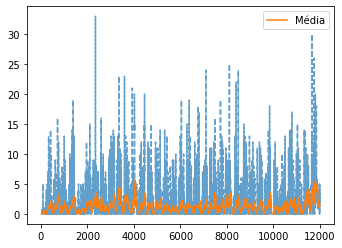

In [9]:
fig, ax = plt.subplots(figsize=(5.5, 4))
ax.plot(srI, alpha=0.7)
ax.plot(rolling_mean, label="Média")
plt.legend()
plt.show()

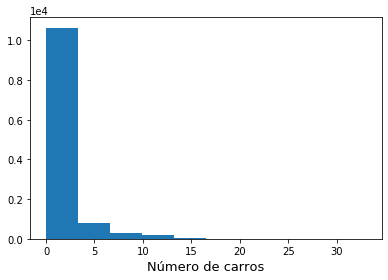

In [32]:
fig, ax = plt.subplots(figsize=(5.5,4))
ax.hist(rua_I)
ax.set_xlabel("Número de carros", fontdict={'fontsize':13})
ax.set_ylabel("", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig("plots/hist_ruaI.pdf")
plt.show()

## Rua II

In [21]:
rua_II = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")

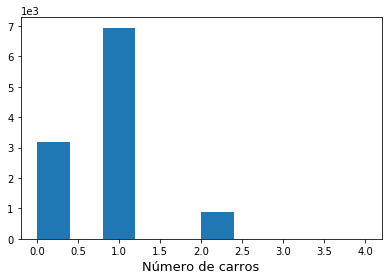

In [33]:
fig, ax = plt.subplots(figsize=(5.5,4))
ax.hist(rua_II)
ax.set_xlabel("Número de carros", fontdict={'fontsize':13})
ax.set_ylabel("", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig("plots/hist_ruaII.pdf")
plt.show()

## Rua III

In [22]:
rua_III = np.load("datasets/002_Av. Norte Sul_30min.npy")

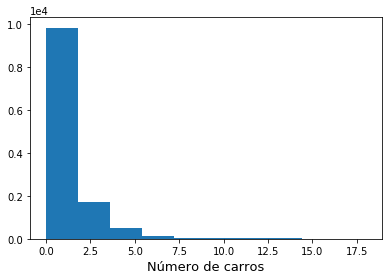

In [34]:
fig, ax = plt.subplots(figsize=(5.5,4))
ax.hist(rua_III)
ax.set_xlabel("Número de carros", fontdict={'fontsize':13})
ax.set_ylabel("", fontdict={'fontsize':13})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig("plots/hist_ruaIII.pdf")
plt.show()

##  Plotagem séries temporais

In [26]:
def timeTicksDHM(xtick,dataset):
    """
    Converte o número em um formato de Dias, Horas e Minutos
    """
    
    if (dataset=='waze'):
        split = xtick.get_text().split('-')
        dia, mes, ano_hs = split
        ano = ano_hs.split(" ")[0]
    else:
        
        split = xtick.get_text().split('-')
        ano, mes, dia = split
    
    return dia + "-" + mes + "-" + ano

In [3]:
import matplotlib
import datetime

In [19]:
settings = {'l_size':13}

In [48]:
list_dates_rI[0].split('-')

['28', '03', '2019 00']

## BikeSharing

In [6]:
bikes = np.load("datasets/bike_sharing_2012to2019_inputed.npy")

In [98]:
datetime.date.strftime(list_dates[100], "%d-%m-%Y %H")

'05-01-2011 04'

In [99]:
list_dates_month = [datetime.date.strftime(data, "%d-%m-%Y %H") for data in list_dates[:672]]

In [139]:
xtick_labels = list(ax.get_xticklabels())

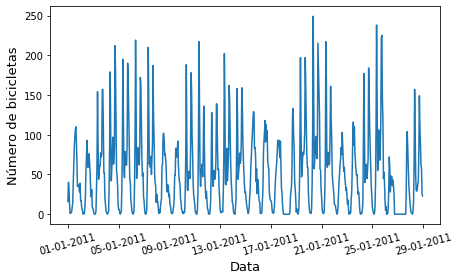

In [145]:
fig, ax = plt.subplots(figsize=(6.5,4))
ax.plot(list_dates[:672], bikes.flatten()[:672])
plt.ylabel("Número de bicicletas", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
labels = [timeTicksDHM(item) for item in xtick_labels]
ax.set_xticklabels(labels)

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("plots/1mes_bike.pdf")
plt.show()

In [138]:
#ano mes dia
ax.get_xticklabels()[0].get_text().split('-')

['2011', '01', '01']

In [83]:
formatted_date

'05-01-2011'

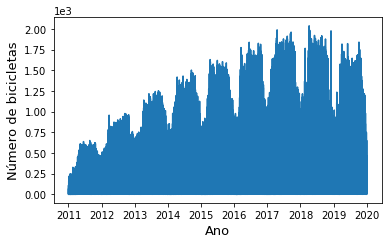

In [17]:
fig, ax = plt.subplots(figsize=(5.5,3.5))
plt.plot(list_dates, bikes.flatten())
plt.ylabel("Número de bicicletas", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Ano", fontdict={'fontsize':settings['l_size']})
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig("plots/bike_2011_2019.pdf")
plt.show()

## Rua I

In [10]:
ruaI_csv = pd.read_csv("datasets/csvs/000_Av. Nossa Senhora da Penha_30min.csv", index_col=0)

In [11]:
def get_list_dates(array_dates, fmt="%d-%m-%Y %H"):
    list_dates_conv = [datetime.date.strftime(pd.to_datetime(data),fmt) for data in array_dates]
    return list_dates_conv

In [12]:
ruaI_csv['date'] = pd.to_datetime(ruaI_csv['date'])
data_ruaI = ruaI_csv['date'].values
#data_ruaI = data_ruaI.astype(datetime.datetime)

In [17]:
len(data_ruaI), len(rua_I)

(12000, 12000)

In [14]:
# list_dates_rI = get_list_dates(data_ruaI)

In [25]:
xticks_ruaI = list(ax.get_xticklabels())

In [100]:
xticks_ruaI

[Text(737147.0, 0, '2019-03-29'),
 Text(737150.0, 0, '2019-04-01'),
 Text(737154.0, 0, '2019-04-05'),
 Text(737158.0, 0, '2019-04-09'),
 Text(737162.0, 0, '2019-04-13'),
 Text(737166.0, 0, '2019-04-17'),
 Text(737170.0, 0, '2019-04-21'),
 Text(737174.0, 0, '2019-04-25')]

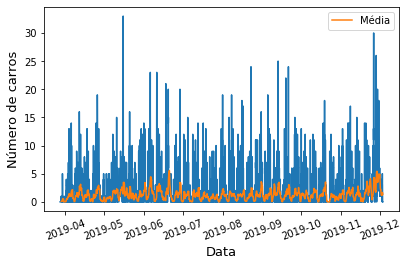

In [31]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaI, rua_I.flatten())
plt.plot(data_ruaI, rolling_mean,label='Média')
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
# labels = [timeTicksDHM(item,dataset='waze') for item in xticks_ruaI]
# ax.set_xticklabels(labels)
plt.xticks(rotation=20)
plt.legend()
plt.tight_layout()
plt.savefig("plots/ruaI_media.png")
plt.show()

In [17]:
labels = [timeTicksMesAno(item) for item in list(ax.get_xticklabels())]

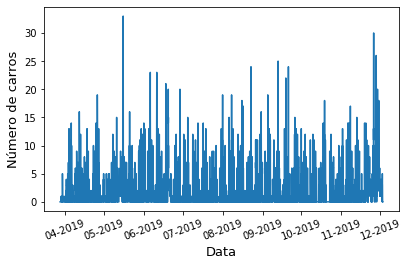

In [20]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaI, rua_I.flatten())
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
ax.set_xticklabels(labels)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("plots/rua_I_data.pdf")
plt.show()

## Rua II

In [24]:
ruaII_csv = pd.read_csv("datasets/csvs/001_Av. Robert Kennedy_30min.csv",index_col=0)
ruaII_csv['date'] = pd.to_datetime(ruaII_csv['date'])
data_ruaII = ruaII_csv['date'].values
#data_ruaI = data_ruaI.astype(datetime.datetime)
#list_dates_rII = get_list_dates(data_ruaII)

In [81]:
xticks_ruaII = list(ax.get_xticklabels())

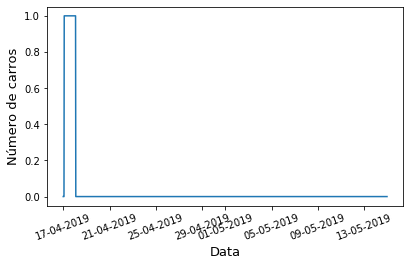

In [85]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaII, rua_II.flatten()[:1344])
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
labels = [timeTicksDHM(item,'') for item in xticks_ruaII]
ax.set_xticklabels(labels)
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("plots/1mes_ruaII_data.pdf")
plt.show()

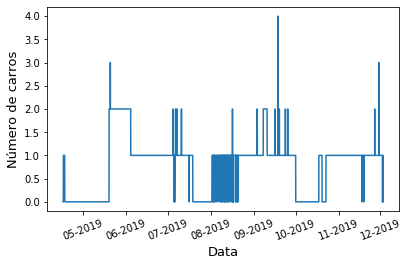

In [29]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaII, rua_II.flatten())
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
plt.xticks(rotation=20)
plt.tight_layout()
labels = [timeTicksMesAno(item) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.savefig("plots/ruaII_data.eps")
plt.show()

# Rua III

In [30]:
ruaIII_csv = pd.read_csv("datasets/csvs/002_Av. Norte Sul_30min.csv",index_col=0)
ruaIII_csv['date'] = pd.to_datetime(ruaIII_csv['date'])
data_ruaIII = ruaIII_csv['date'].values
#data_ruaI = data_ruaI.astype(datetime.datetime)
# list_dates_rIII = get_list_dates(data_ruaIII)

In [43]:
xticks_ruaIII = list(ax.get_xticklabels())

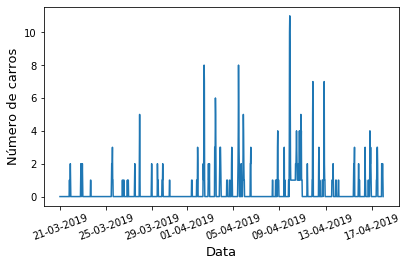

In [44]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaIII[:1344], rua_III.flatten()[:1344])
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})

labels = [timeTicksDHM(item,'') for item in xticks_ruaIII]
ax.set_xticklabels(labels)
plt.xticks(rotation=20)
# labels = [timeTicksDHM(item, '') for item in ax.get_xticklabels()]
# ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig("plots/1mes_ruaIII_data.eps")
plt.show()

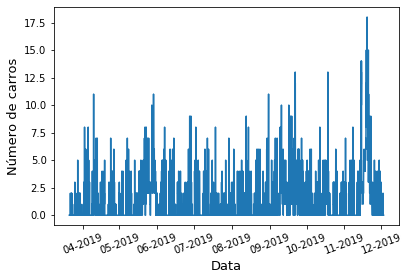

In [34]:
fig, ax = plt.subplots(figsize=(5.8,3.8))
plt.plot(data_ruaIII, rua_III.flatten())
plt.ylabel("Número de carros", fontdict={'fontsize':settings['l_size']})
plt.xlabel("Data", fontdict={'fontsize':settings['l_size']})
plt.tight_layout()
# labels = [timeTicksDHM(item,'') for item in xticks_ruaIII]
# ax.set_xticklabels(labels)
plt.xticks(rotation=20)
labels = [timeTicksMesAno(item) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.savefig("plots/ruaIII_data.eps")
plt.show()

In [7]:
list_datasets = [bikesharing, rua_I, rua_II, rua_III]
list_datasets_name = ['bike','rua I', 'rua II', 'rua III']

In [15]:
for d, dname in zip(list_datasets,list_datasets_name):
    print (dname)
    d = d.flatten()    
    print ("mean {:.3f}".format(d.mean()))
    print ("std {:.3f}".format(d.std()))
    print ("min {:.3f}".format(np.min(d)))
    print ("max {:.3f}".format(np.max(d)))

bike
mean 329.481
std 337.720
min 0.000
max 2037.000
rua I
mean 1.243
std 2.578
min 0.000
max 33.000
rua II
mean 0.792
std 0.574
min 0.000
max 4.000
rua III
mean 0.838
std 1.643
min 0.000
max 18.000


## Ruas Multivariadas

In [11]:
df_rua4_17 = pd.read_csv("datasets/csvs/df_rua4_to_rua17.csv", index_col=0)

In [12]:
df_rua4_8 = df_rua4_17[['date','rua_4','rua_5','rua_6','rua_7','rua_8']]

In [13]:
df_rua4_8 = df_rua4_8.rename(columns={'rua_4': 'Rua IV', 'rua_5':'Rua V',
                          'rua_6':'Rua VI','rua_7':'Rua VII', 'rua_8':'Rua VIII'})

In [5]:
list_datas_rua48 = pd.to_datetime(df_rua4_8['date'])

In [10]:
df_rua4_8.columns

Index(['date', 'Rua IV', 'Rua V', 'Rua VI', 'Rua VII', 'Rua VIII'], dtype='object')

In [8]:
# xticks_ruas48 = list(ax.get_xtick_labels())

In [14]:
df_rua4_8[['Rua IV', 'Rua V', 'Rua VI', 'Rua VII', 'Rua VIII']] = df_rua4_8[['Rua IV', 'Rua V', 'Rua VI', 'Rua VII', 'Rua VIII']].astype('float')

In [13]:
xticks_ruaIII = list(ax[-1].get_xticklabels())

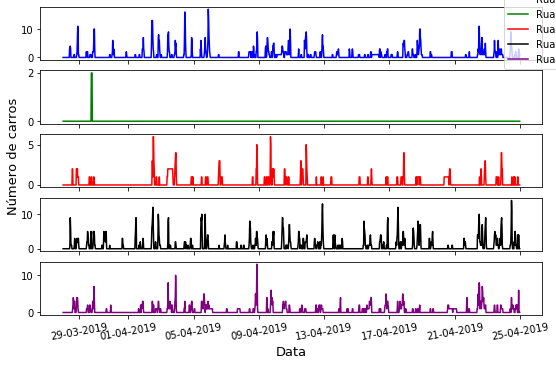

In [35]:
ruas = ['rua_4','rua_5','rua_6','rua_7','rua_8']
labels = ["Rua IV", "Rua V", "Rua VI", "Rua VII", "Rua VIII"]
colors = ['blue','green','red','black','purple']
fig, ax = plt.subplots(nrows=len(ruas), sharex=True, figsize=(9,8))
for i,r in enumerate(labels):
    ax[i].plot(list_datas_rua48[:1344], df_rua4_8[r][:1344], label=labels[i], color=colors[i])

xtick_labels = [timeTicksDHM(item,'') for item in xticks_ruaIII]
ax[-1].set_xticklabels(xtick_labels)
fig.legend(loc='upper right',bbox_to_anchor=(0.35, 0.55, 0.55, 0.11))
plt.xticks(rotation=10)
plt.xlabel("Data", fontdict={'fontsize':13})
ax[-1].set_ylabel("Número de carros", fontdict={'fontsize':13})
ax[-1].yaxis.set_label_coords(-0.04,3)
plt.subplots_adjust(top=0.66)
plt.savefig("plots/trends_ruas_4_8.pdf")
plt.show()

In [36]:
def timeTicksMesAno(xtick):
    """
    Converte o número em um formato de Dias, Horas e Minutos
    """
    split = xtick.get_text().split('-')
    ano, mes = split
    
    return mes + "-" + ano

In [38]:
xticks_rua48_toda = list(ax[-1].get_xticklabels())

In [9]:
labels = ["Rua IV", "Rua V", "Rua VI", "Rua VII", "Rua VIII"]

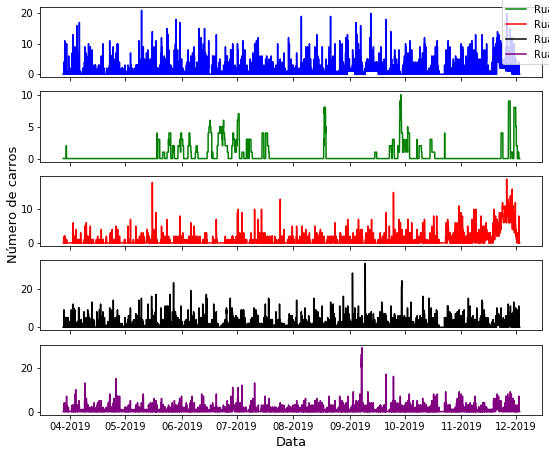

In [61]:
ruas = ['rua_4','rua_5','rua_6','rua_7','rua_8']
labels = ["Rua IV", "Rua V", "Rua VI", "Rua VII", "Rua VIII"]
colors = ['blue','green','red','black','purple']
fig, ax = plt.subplots(nrows=len(ruas), sharex=True, figsize=(9,7.5))
for i,r in enumerate(labels):
    ax[i].plot(list_datas_rua48, df_rua4_8[r], label=labels[i], color=colors[i])

xtick_labels = [timeTicksMesAno(item) for item in xticks_rua48_toda]
ax[-1].set_xticklabels(xtick_labels)
bbox_anchor = (0.33, 0.56, 0.567, 0.32)
fig.legend(loc='upper right', bbox_to_anchor=bbox_anchor)
# plt.xticks(rotation=10)
plt.xlabel("Data", fontdict={'fontsize':13})
ax[-1].set_ylabel("Número de carros", fontdict={'fontsize':13})
ax[-1].yaxis.set_label_coords(-0.04,3)
# plt.subplots_adjust(top=0.66)()
plt.savefig("plots/trends_total_ruas_4_8.pdf")
plt.show()

In [103]:
corr = df_rua4_8[["Rua IV", "Rua V", "Rua VI", "Rua VII", "Rua VIII"]].corr()

In [114]:
corr

Rua IV     Rua V    Rua VI   Rua VII  Rua VIII
Rua IV    1.000000 -0.014892  0.378735  0.366506  0.294440
Rua V    -0.014892  1.000000  0.125285  0.026437  0.005104
Rua VI    0.378735  0.125285  1.000000  0.217470  0.249086
Rua VII   0.366506  0.026437  0.217470  1.000000  0.200704
Rua VIII  0.294440  0.005104  0.249086  0.200704  1.000000

In [117]:
(1 - 0.5)/2

0.25

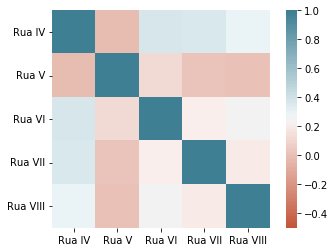

In [119]:
ax = sns.heatmap(corr, vmin=-0.5, vmax=1, center=0.25,
                 cmap=sns.diverging_palette(20,220, n=200),
                 square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    verticalalignment='center'
);
plt.savefig("correlacao_ruas.eps")

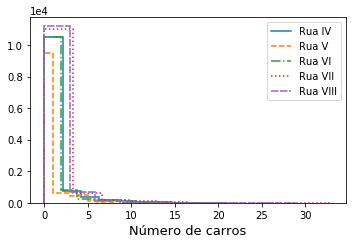

In [22]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.hist(df_rua4_8[labels[0]], linestyle='-', histtype='step', lw=1.5, label=labels[0])
ax.hist(df_rua4_8[labels[1]], linestyle='--', histtype='step', lw=1.5, label=labels[1])
ax.hist(df_rua4_8[labels[2]], linestyle='-.', histtype='step', lw=1.5, label=labels[2])
ax.hist(df_rua4_8[labels[3]], linestyle=':', histtype='step', lw=1.5, label=labels[3])
ax.hist(df_rua4_8[labels[4]], linestyle=(0, (5,1)), histtype='step', lw=1.5, label=labels[4])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
handles, labels_legenda = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor(), linestyle=h.get_linestyle()) for h in handles]
plt.legend(handles=new_handles, labels=labels_legenda)
plt.xlabel("Número de carros", fontdict={"fontsize":13})
plt.tight_layout()
plt.savefig("plots/hist_ruas_total.pdf")

In [18]:
h = handles[0]

In [20]:
h.get_linestyle()

'-'

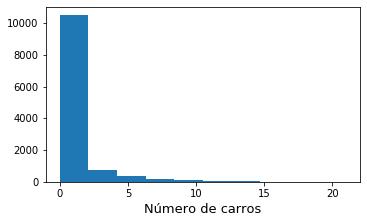

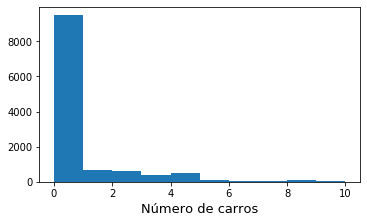

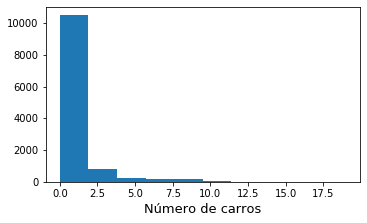

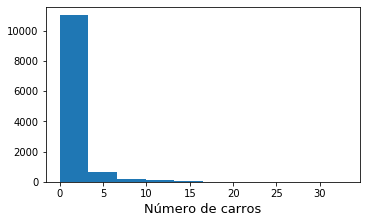

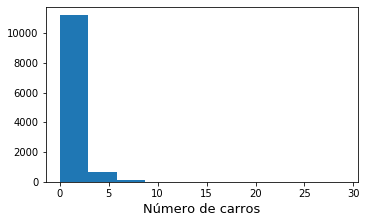

In [147]:
for l in labels:
    fig, ax = plt.subplots(figsize=(5.2, 3.2))
    ax.hist(df_rua4_8[l])
    plt.xlabel("Número de carros", fontdict={"fontsize":13})
    plt.tight_layout()
    plt.savefig("plots/hist_ruas_48_{}.eps".format(l))
    plt.show()

In [5]:
list_datas_ruas = p.get_list_dates(12000,2019,3,28,timedelta(minutes=30))

In [27]:
list_datas_ruas_corretas = [t-timedelta(hours=3) for t in list_datas_ruas]

In [28]:
list_datas_ruas[0]

datetime.datetime(2019, 3, 28, 0, 0)

In [29]:
list_datas_ruas_corretas[0]

datetime.datetime(2019, 3, 27, 21, 0)

In [25]:
markers = [".", "^", "v", "*", "s", "|", "d"]
dias_semana = ["Seg.","Ter.", "Qua.", "Qui.", "Sex.", "Sáb.", "Dom."]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

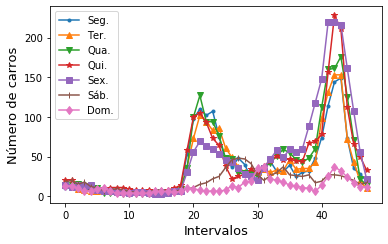

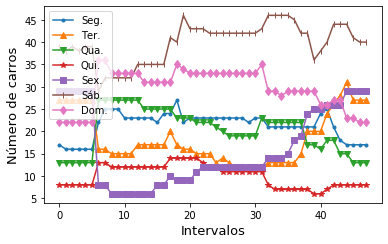

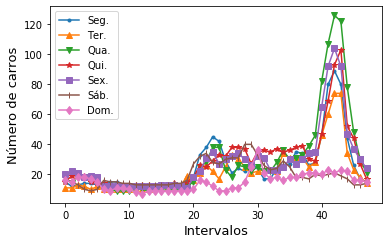

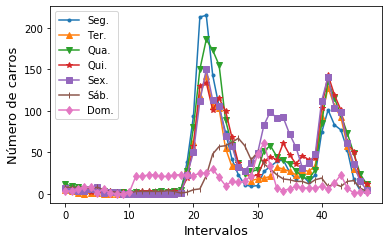

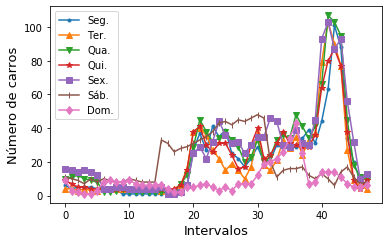

In [30]:
for l in labels:
    df_real_l = p.get_df(list_datas_ruas_corretas, df_rua4_8[l].values.reshape(2400,5), w=48)
    wks_ruas = [p.get_count(df_real_l,i,48) for i in range(7)]
    fig, ax = plt.subplots(figsize=(5.5, 3.5))
    for i in range(7):
        ax.plot(wks_ruas[i],label=dias_semana[i],marker=markers[i])
    if (l=="Rua V"):
        plt.legend(loc="upper left")
    else:
        plt.legend()
    plt.ylabel("Número de carros", fontdict={'fontsize':13})
    plt.xlabel("Intervalos", fontdict={'fontsize':13})
    plt.tight_layout()
    plt.savefig("plots/soma_intervalo_ruas_{}.eps".format(l))

### Somas intervalos

In [7]:
list_datas_ruas = p.get_list_dates(12000,2019,3,28,timedelta(minutes=30))

In [12]:
label_ruas = df_rua4_8.columns[1:]
vetor_ruas = df_rua4_8[label_ruas].values

In [13]:
scaler_rua48 = MinMaxScaler().fit(vetor_ruas.reshape(-1,1))

In [14]:
ruas48_crnngan = np.load("crnn/transito_vitoria/ruas/samples/sample_data_wz_2_190_2021-08-05-01-45-49.npy")
ruas48_rgan = np.load("rgan/transito_vitoria/ruas/samples/sample_data_waze_test10_0.npy")
ruas48_timegan = np.load("timegan/transito_vitoria/ruas/samples/timegan_r4_8_0.npy")

In [15]:
ruas48_crnngan_scaled = scaler_rua48.inverse_transform(ruas48_crnngan.reshape(-1,1)).reshape(12000,5)
ruas48_rgan_scaled = scaler_rua48.inverse_transform(ruas48_rgan.reshape(-1,1)).reshape(12000,5)
ruas48_timegan_scaled = scaler_rua48.inverse_transform(ruas48_timegan.reshape(-1,1)).reshape(12000,5)

In [166]:
ruas48_crnngan.shape

(250, 48, 5)

In [167]:
250 * 48 * 5

60000

In [173]:
wk_df_fake_crnngan

date       cnt  hr  wk   M
0     2019-03-28 00:00:00 -9.074052   0   3   0
1     2019-03-28 00:30:00  1.874240   0   3   1
2     2019-03-28 01:00:00  3.016147   1   3   2
3     2019-03-28 01:30:00 -1.585589   1   3   3
4     2019-03-28 02:00:00  0.982276   2   3   4
...                   ...       ...  ..  ..  ..
11995 2019-12-02 21:30:00  1.428367  21   0  43
11996 2019-12-02 22:00:00  0.762903  22   0  44
11997 2019-12-02 22:30:00 -2.616735  22   0  45
11998 2019-12-02 23:00:00  1.621980  23   0  46
11999 2019-12-02 23:30:00 -0.730030  23   0  47

[12000 rows x 5 columns]

In [22]:
list_datas_ruas[0]

datetime.datetime(2019, 3, 28, 0, 0)

In [23]:
list_datas_ruas[-1]

datetime.datetime(2019, 12, 2, 23, 30)

In [16]:
labels_gans = ['C-RNN-GAN', 'RGAN', 'TimeGAN']

In [18]:
nomes_dias = ["Seg", "Ter", "Qua", "Qui", "Sab", "Dom"]

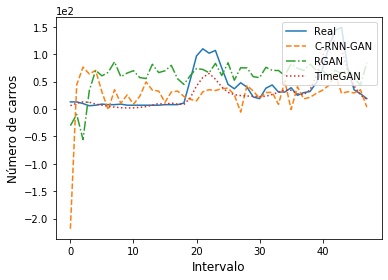

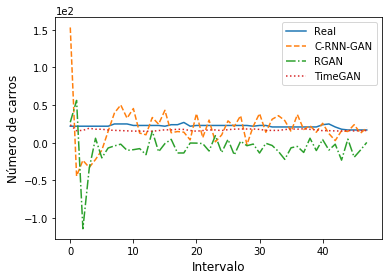

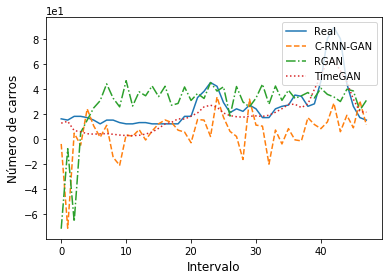

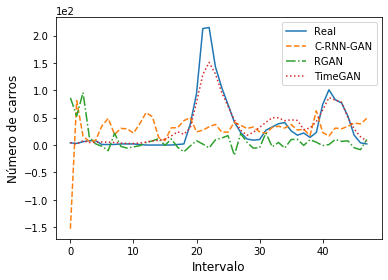

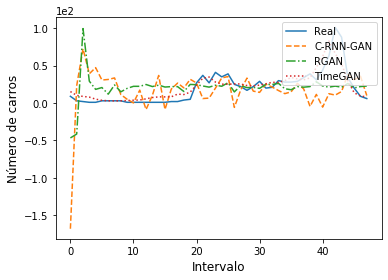

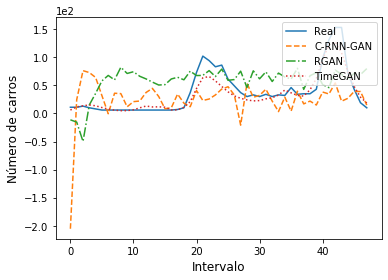

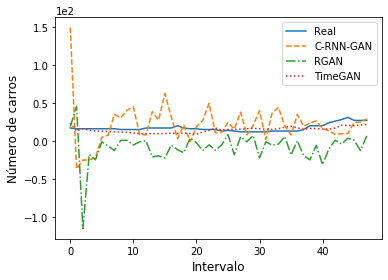

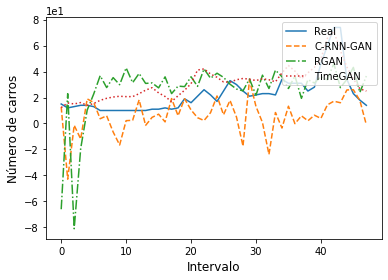

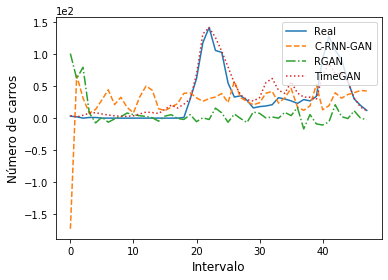

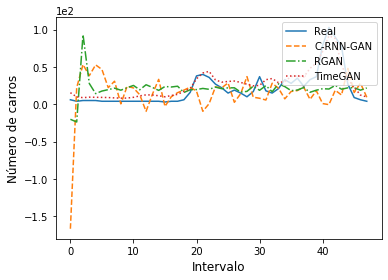

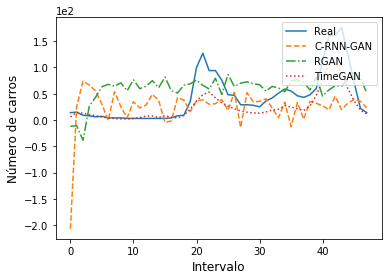

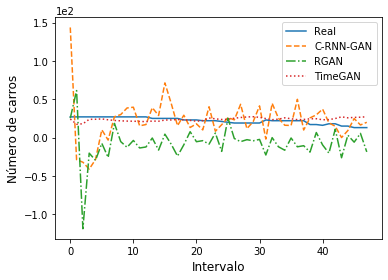

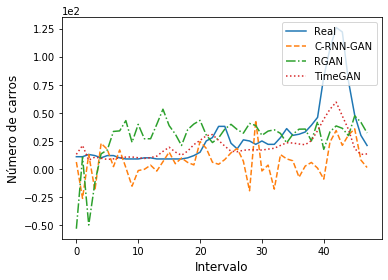

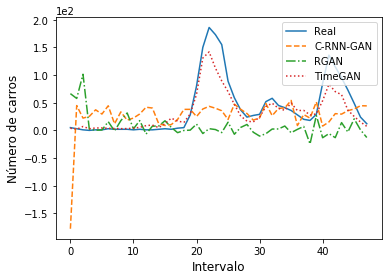

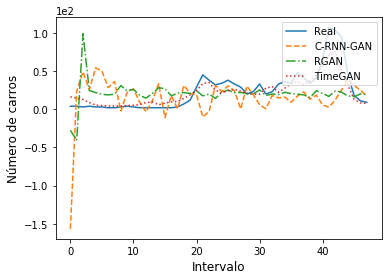

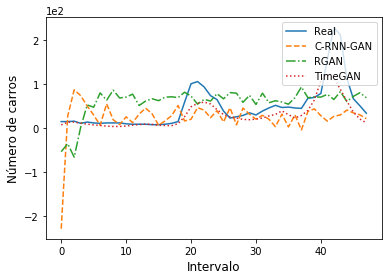

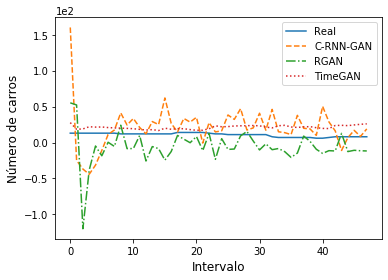

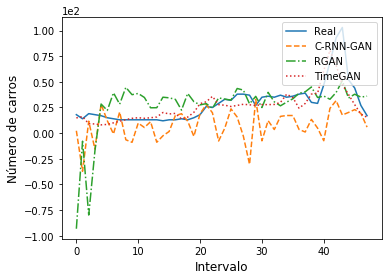

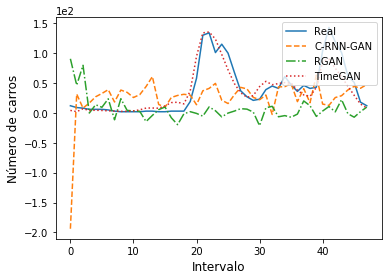

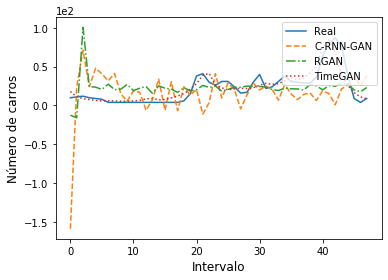

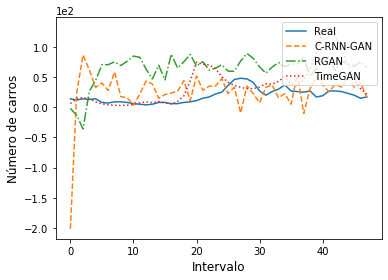

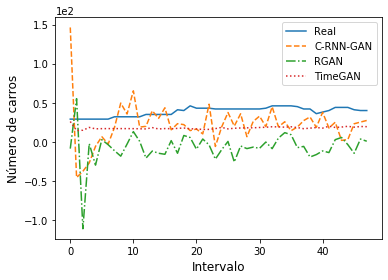

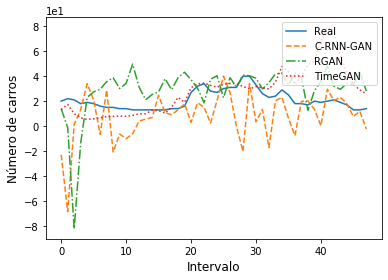

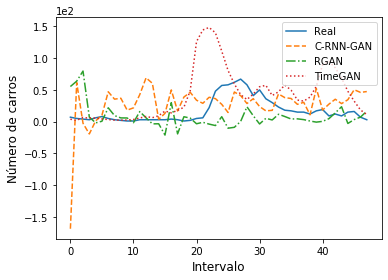

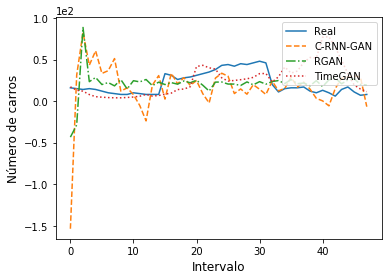

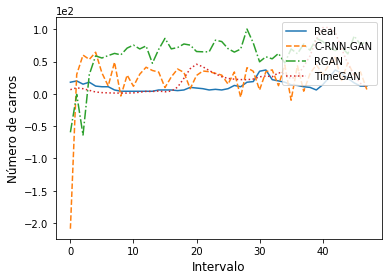

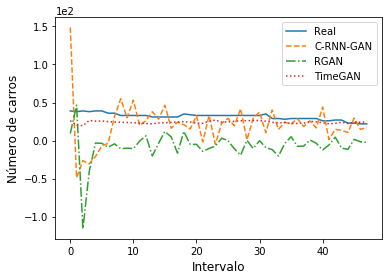

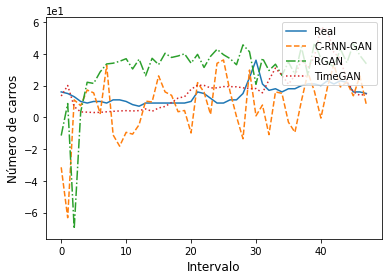

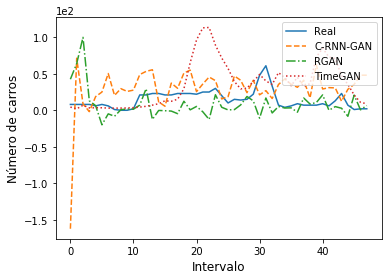

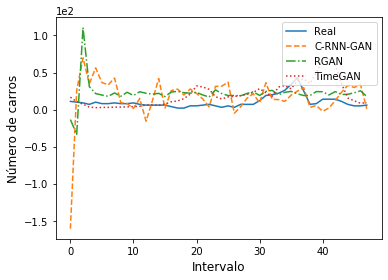

In [21]:
dias = [0,1,2,3,5,6]

for d in range(len(dias)):
    for i in range(5):
        df_r = p.get_df(list_datas_ruas, vetor_ruas[:,i].reshape(250,48,1), w=48)

        wk_real_df_r = p.get_count(df_r,dias[d],48)

        wk_df_fake_crnngan = p.get_df(list_datas_ruas,ruas48_crnngan_scaled[:,i].reshape(250,48,1),w=48)
        wk_df_fake_rgan = p.get_df(list_datas_ruas,ruas48_rgan_scaled[:,i].reshape(250,48,1),w=48)
        wk_df_fake_timegan = p.get_df(list_datas_ruas,ruas48_timegan_scaled[:,i].reshape(250,48,1),w=48)

        plot_sum(wk_real_df_r,[wk_df_fake_crnngan, wk_df_fake_rgan, wk_df_fake_timegan],
                 "{}_{}".format(label_ruas[i], nomes_dias[d]),
                 dias[d],labels=labels_gans,linestyles=['--','-.',':','-'], interval=48,
                 xlabel="Intervalo", ylabel="Número de carros", loc_leg='upper right')

In [93]:
df_s_002 = p.get_df_fake(s0,list_dates)
# df_s1 = p.get_df_fake(s1,list_dates)

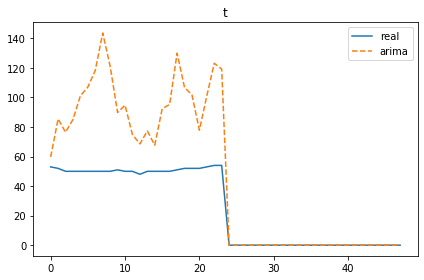

In [94]:
wk_real_2 = p.get_count(df_real,4,48)
plot_sum(wk_real_2,[df_s_002],"t",4,labels=['arima'],linestyles=["--",], interval=48)

## Bikesharing

In [4]:
bike_sharing = np.load("datasets/bike_sharing_2012to2019_inputed.npy")
scaler_bike  = MinMaxScaler().fit(bike_sharing.reshape(-1,1))
# bike_sharing = scaler_bike.transform(bike_sharing.reshape(-1,1))
# bike_sharing = bike_sharing.reshape(len(bike_sharing)//24, 24, 1)

In [5]:
timegan = np.load("timegan/bikesharing/samples/test_4_0.npy")
rgan = np.load("rgan/bikesharing/samples/0_sample_data_bike_test6_1960.npy")
arimab = np.load("arima/bikesharing/sample_bike_arima_0.npy")

In [6]:
crnn_gan = np.load("crnn/bikesharing/samples/sample_data_bike_test12_48_2021-03-24-14-22-20.npy")

In [7]:
# crnn_gan = np.load("crnn/test12/sample_data_bike_test12_48_2021-03-24-14-22-20.npy")

In [8]:
arimab = np.exp(arimab)

In [9]:
timegan = scaler_bike.inverse_transform(timegan.reshape(-1,1))
rgan = scaler_bike.inverse_transform(rgan.reshape(-1,1))

In [10]:
#crnn_gan[crnn_gan<0] = 0.00
crnn_gan = scaler_bike.inverse_transform(crnn_gan.reshape(-1,1))

In [11]:
timegan = timegan[:78888].reshape(bike_sharing.shape)
rgan = rgan.reshape(bike_sharing.shape)

In [12]:
arimab = arimab.reshape(bike_sharing.shape)

In [13]:
list_dates = p.get_list_dates(len(bike_sharing.flatten()), 2011,1,1, timedelta(hours=1))

In [14]:
df_bike_real = p.get_df(list_dates, bike_sharing)

In [15]:
df_timegan = p.get_df(list_dates,timegan)
df_rgan = p.get_df(list_dates,rgan)
df_arima = p.get_df(list_dates,arimab)

In [16]:
df_crnngan = p.get_df(list_dates,crnn_gan)

In [32]:
# df_plot[df_plot['hr']==i]['cnt'].sum()
df_timegan[df_timegan['hr']==0]['cnt'].sum()

250240.02

In [17]:
labels_gans = ['ARIMA','C-RNN-GAN','RGAN','TimeGAN']

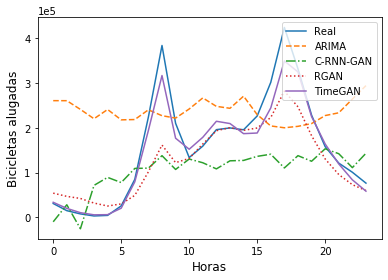

In [19]:
wk_real = p.get_count(df_bike_real,4,24)
plot_sum(wk_real,[df_arima, df_crnngan, df_rgan, df_timegan], "sums_bikesharing_sex",4,labels=['ARIMA','C-RNN-GAN','RGAN','TimeGAN'],linestyles=["--",'-.',':','-'], interval=24)

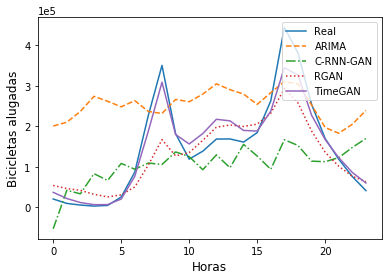

In [20]:
day = 0
wk_real = p.get_count(df_bike_real,day,24)
plot_sum(wk_real,[df_arima, df_crnngan, df_rgan, df_timegan],"sums_bikesharing_seg",day,labels=['ARIMA','C-RNN-GAN','RGAN','TimeGAN'],linestyles=["--",'-.',':','-'], interval=24)

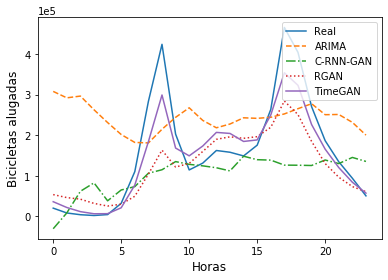

In [22]:
day = 2
wk_real_qua = p.get_count(df_bike_real,day,24)
plot_sum(wk_real_qua,[df_arima, df_crnngan, df_rgan, df_timegan],"sums_bikesharing_qua",day,labels=labels_gans,linestyles=["--",'-.',':','-'], interval=24)

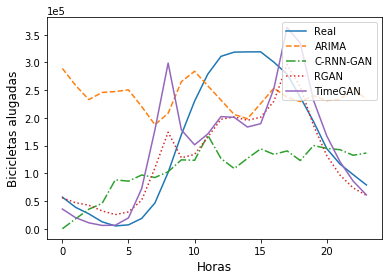

In [23]:
day = 5
wk_real_sab = p.get_count(df_bike_real,day,24)
plot_sum(wk_real_sab,[df_arima, df_crnngan, df_rgan, df_timegan], "sums_bikesharing_sab", day, labels=labels_gans,linestyles=["--",'-.',':','-'], interval=24)

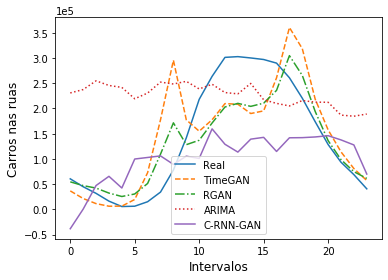

In [75]:
day = 6
wk_real_dom = p.get_count(df_bike_real,day,24)
plot_sum(wk_real_dom,[df_timegan,df_rgan,df_arima,df_crnngan], "sums_bikesharing_dom", day, labels=['TimeGAN','RGAN','ARIMA','C-RNN-GAN'],linestyles=["--",'-.',':','-'], interval=24)

In [28]:
len(df_bike_real[df_bike_real["wk"]==5])

11280

In [29]:
len(df_bike_real[df_bike_real["wk"]==6])

11280

In [33]:
(11208*2*100) / 78888

28.414968055978097

In [35]:
(11208*2)

22416

In [66]:
wks = [p.get_count(df_bike_real,i,24) for i in range(7)]

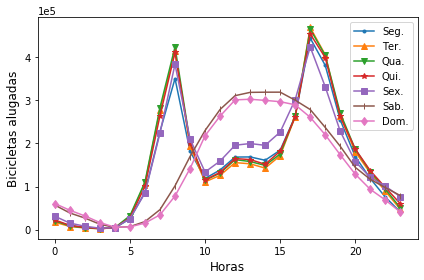

In [69]:
fakes = []
fig, ax = plt.subplots()
ax.plot(wks[0],label='Seg.',marker='.')
ax.plot(wks[1],label='Ter.',marker='^')
ax.plot(wks[2],label='Qua.',marker='v')
ax.plot(wks[3],label='Qui.',marker='*')
ax.plot(wks[4],label='Sex.',marker='s')
ax.plot(wks[5],label='Sab.',marker='|')
ax.plot(wks[6],label='Dom.',marker='d')
plt.xlabel("Horas", fontdict={'fontsize':12})


plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("Bicicletas alugadas", fontdict={'fontsize':12})
plt.tight_layout()
plt.legend()    
plt.savefig("sum_dfs_dias.pdf")
plt.show()
# plt.clf()
# plt.close()

In [34]:
bike_sharing_arima = np.load("datasets/bikesharing_arima.npy")

In [19]:
tgan_b = np.load("timegan/test4/sample_data_bike_test4_0.npy")
rgan_b = np.load("rgan/test2/avaliados/sample_data_bike_test2_1780.npy")
arima_b = np.load("arima/bike_sharing/best_test_arima.npy")

In [62]:
cnn_gan_b = np.load("crnn/test12/sample_data_bike_test12_8_2021-03-24-14-15-21.npy")
cnn_gan_b[cnn_gan_b<0] = 0.0

In [44]:
bike_sharing_arima = bike_sharing.flatten()
bike_sharing_arima = bike_sharing_arima[46:]
#arima_b = arima_b.reshape(bike_sharing.shape)

In [32]:
arima_b = pd.Series(arima_b.flatten())
rolling_mean = arima_b.rolling(window=24).mean()
data_log_plus_mean = arima_b + rolling_mean
data_log_plus_mean.dropna(inplace=True)

In [33]:
rolling_std  = data_log_plus_mean.rolling(window=24).std()
data_log_plus_mean = data_log_plus_mean + rolling_std
data_log_plus_mean.dropna(inplace=True)

In [37]:
data_log_plus_mean = np.exp(data_log_plus_mean)

In [42]:
len(data_log_plus_mean) - len(bike_sharing.flatten())

-46

In [67]:
data_log_plus_mean = scaler_bike.transform(data_log_plus_mean.reshape(-1,1))
data_log_plus_mean = data_log_plus_mean.reshape(len(data_log_plus_mean)//24,24,1)

In [13]:
fake_datasets = [tgan_b, rgan_b]

In [16]:
list_dfs = list()
for fds in fake_datasets:
    df = tstr.run_tstr(bike_sharing,fds,24,batch_size=28)
    list_dfs.append(df)

Training on real data...
Epoch 1/200
89/89 [==============================] - 3s 38ms/step - loss: 0.2570 - val_loss: 0.0381
Epoch 2/200
89/89 [==============================] - 2s 22ms/step - loss: 0.0307 - val_loss: 0.0350
Epoch 3/200
89/89 [==============================] - 2s 19ms/step - loss: 0.0290 - val_loss: 0.0334
Epoch 4/200
89/89 [==============================] - 2s 20ms/step - loss: 0.0277 - val_loss: 0.0316
Epoch 5/200
89/89 [==============================] - 2s 20ms/step - loss: 0.0265 - val_loss: 0.0303
Epoch 6/200
89/89 [==============================] - 2s 20ms/step - loss: 0.0254 - val_loss: 0.0287
Epoch 7/200
89/89 [==============================] - 2s 20ms/step - loss: 0.0238 - val_loss: 0.0261
Epoch 8/200
89/89 [==============================] - 2s 19ms/step - loss: 0.0211 - val_loss: 0.0217
Epoch 9/200
89/89 [==============================] - 8s 94ms/step - loss: 0.0190 - val_loss: 0.0203
Epoch 10/200
89/89 [==============================] - 8s 95ms/step - loss: 

In [54]:
bike_sharing_arima = bike_sharing_arima[:78840].reshape(78840//24,24,1)
data_log_plus_mean = np.array(data_log_plus_mean[:78840]).reshape(bike_sharing_arima.shape)

In [73]:
list_dfs[2] = 0

In [74]:
for fds in [data_log_plus_mean]:
    df = tstr.run_tstr(bike_sharing_arima,fds,24,batch_size=28)
    list_dfs.append(df)

Training on real data...
Epoch 1/200
88/88 [==============================] - 2s 17ms/step - loss: 0.2143 - val_loss: 0.0824
Epoch 2/200
88/88 [==============================] - 1s 15ms/step - loss: 0.0687 - val_loss: 0.0718
Epoch 3/200
88/88 [==============================] - 1s 17ms/step - loss: 0.0599 - val_loss: 0.0610
Epoch 4/200
88/88 [==============================] - 2s 22ms/step - loss: 0.0475 - val_loss: 0.0384
Epoch 5/200
88/88 [==============================] - 2s 18ms/step - loss: 0.0296 - val_loss: 0.0270
Epoch 6/200
88/88 [==============================] - 2s 19ms/step - loss: 0.0279 - val_loss: 0.0290
Training on fake data...
Epoch 1/200
88/88 [==============================] - 2s 23ms/step - loss: 0.3090 - val_loss: 0.1193
Epoch 2/200
88/88 [==============================] - 2s 20ms/step - loss: 0.0096 - val_loss: 0.1314


In [78]:
list_dfs

[                 r2       MAE      MRLE
 Real       0.570925  0.020508  0.000663
 Synthetic  0.100313  0.035494  0.001453,
                  r2       MAE      MRLE
 Real       0.574223  0.020860  0.000662
 Synthetic  0.077025  0.034522  0.001477,
                  r2       MAE      MRLE
 Real       0.741243  0.028984  0.001094
 Synthetic -3.021026  0.131440  0.018889]

In [79]:
index_name = ["Real","TimeGAN","RGAN","ARIMA",]
dict_bike = {
    "r2":[],
    "MAE":[],
    "MRLE":[]
}
dict_bike['r2'].append(list_dfs[0]['r2']['Real'])
dict_bike['MAE'].append(list_dfs[0]['MAE']['Real'])
dict_bike['MRLE'].append(list_dfs[0]['MRLE']['Real'])

for dfs in list_dfs:
    dict_bike['r2'].append(dfs['r2']['Synthetic'])
    dict_bike['MAE'].append(dfs['MAE']['Synthetic'])
    dict_bike['MRLE'].append(dfs['MRLE']['Synthetic'])
df_bike = pd.DataFrame(dict_bike,index=index_name)

In [80]:
df_bike

r2       MAE      MRLE
Real     0.570925  0.020508  0.000663
TimeGAN  0.100313  0.035494  0.001453
RGAN     0.077025  0.034522  0.001477
ARIMA   -3.021026  0.131440  0.018889

## Rua 000

In [104]:
# real data
rua_000 = np.load("datasets/000_Av_Nossa_Senhora_da_Penha_30min.npy")
rua_000 = rua_000.reshape(len(rua_000)//48, 48, 1)

# arima
s0 = np.load("arima/waze/000/sample_data_waze_test1_000_2021-03-31-00-56-24.npy")
# timegan
s1 = np.load("timegan/waze/kaggle/000/sample_data_waze_test4_3000.npy")

s0 = s0[:len(rua_000)]
s1 = s1[:len(rua_000)]

s0[s0<0] = 0.0
s1[s1<0] = 0.0

In [105]:
rua_000 = rua_000.astype('float32')
scaler_r0 = MinMaxScaler().fit(rua_000.reshape(-1,1))
s1 = scaler_r0.inverse_transform(s1.reshape(-1,1))
s1 = s1.reshape(rua_000.shape)

In [106]:
fake_datasets = [s0,s1,s2,s3]

In [107]:
list_dfs = []
for fds in fake_datasets:
    df = tstr.run_tstr(rua_000,fds,48,batch_size=75)
    list_dfs.append(df)

Training on real data...
Epoch 1/200
7/7 [==============================] - 1s 160ms/step - loss: 0.6366 - val_loss: 0.8303
Epoch 2/200
7/7 [==============================] - 0s 30ms/step - loss: 0.6165 - val_loss: 0.8254
Epoch 3/200
7/7 [==============================] - 0s 28ms/step - loss: 0.5991 - val_loss: 0.8199
Epoch 4/200
7/7 [==============================] - 0s 27ms/step - loss: 0.5816 - val_loss: 0.8136
Epoch 5/200
7/7 [==============================] - 0s 29ms/step - loss: 0.5642 - val_loss: 0.8067
Epoch 6/200
7/7 [==============================] - 0s 27ms/step - loss: 0.5474 - val_loss: 0.7995
Epoch 7/200
7/7 [==============================] - 0s 27ms/step - loss: 0.5324 - val_loss: 0.7921
Epoch 8/200
7/7 [==============================] - 0s 26ms/step - loss: 0.5176 - val_loss: 0.7846
Epoch 9/200
7/7 [==============================] - 0s 29ms/step - loss: 0.5052 - val_loss: 0.7769
Epoch 10/200
7/7 [==============================] - 0s 30ms/step - loss: 0.4922 - val_loss: 

7/7 [==============================] - 0s 26ms/step - loss: 1.3799 - val_loss: 0.5775
Epoch 74/200
7/7 [==============================] - 0s 25ms/step - loss: 1.3794 - val_loss: 0.5761
Epoch 75/200
7/7 [==============================] - 0s 26ms/step - loss: 1.3787 - val_loss: 0.5753
Epoch 76/200
7/7 [==============================] - 0s 26ms/step - loss: 1.3782 - val_loss: 0.5741
Epoch 77/200
7/7 [==============================] - 0s 26ms/step - loss: 1.3777 - val_loss: 0.5731
Epoch 78/200
7/7 [==============================] - 0s 26ms/step - loss: 1.3771 - val_loss: 0.5724
Epoch 79/200
7/7 [==============================] - 0s 27ms/step - loss: 1.3766 - val_loss: 0.5713
Epoch 80/200
7/7 [==============================] - 0s 27ms/step - loss: 1.3762 - val_loss: 0.5703
Epoch 81/200
7/7 [==============================] - 0s 28ms/step - loss: 1.3758 - val_loss: 0.5692
Epoch 82/200
7/7 [==============================] - 0s 27ms/step - loss: 1.3752 - val_loss: 0.5684
Epoch 83/200
7/7 [=====

7/7 [==============================] - 0s 27ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 125/200
7/7 [==============================] - 0s 26ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 126/200
7/7 [==============================] - 0s 25ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 127/200
7/7 [==============================] - 0s 27ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 128/200
7/7 [==============================] - 0s 27ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 129/200
7/7 [==============================] - 0s 25ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 130/200
7/7 [==============================] - 0s 26ms/step - loss: 0.4177 - val_loss: 0.7143
Epoch 131/200
7/7 [==============================] - 0s 25ms/step - loss: 0.4177 - val_loss: 0.7142
Epoch 132/200
7/7 [==============================] - 0s 26ms/step - loss: 0.4177 - val_loss: 0.7142
Epoch 133/200
7/7 [==============================] - 0s 26ms/step - loss: 0.4177 - val_loss: 0.7142
Epoch 134/200


Epoch 12/200
7/7 [==============================] - 1s 78ms/step - loss: 3.2652 - val_loss: 0.7845
Epoch 13/200
7/7 [==============================] - 1s 77ms/step - loss: 3.2582 - val_loss: 0.7814
Epoch 14/200
7/7 [==============================] - 1s 78ms/step - loss: 3.2519 - val_loss: 0.7782
Epoch 15/200
7/7 [==============================] - 1s 111ms/step - loss: 3.2460 - val_loss: 0.7749
Epoch 16/200
7/7 [==============================] - 1s 79ms/step - loss: 3.2402 - val_loss: 0.7713
Epoch 17/200
7/7 [==============================] - 1s 79ms/step - loss: 3.2346 - val_loss: 0.7678
Epoch 18/200
7/7 [==============================] - 1s 77ms/step - loss: 3.2291 - val_loss: 0.7646
Epoch 19/200
7/7 [==============================] - 1s 77ms/step - loss: 3.2232 - val_loss: 0.7609
Epoch 20/200
7/7 [==============================] - 1s 78ms/step - loss: 3.2179 - val_loss: 0.7570
Epoch 21/200
7/7 [==============================] - 1s 78ms/step - loss: 3.2128 - val_loss: 0.7530
Epoch 22/

7/7 [==============================] - 0s 27ms/step - loss: 2.3104 - val_loss: 0.7161
Epoch 48/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3102 - val_loss: 0.7161
Epoch 49/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3101 - val_loss: 0.7160
Epoch 50/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3099 - val_loss: 0.7160
Epoch 51/200
7/7 [==============================] - 0s 25ms/step - loss: 2.3098 - val_loss: 0.7160
Epoch 52/200
7/7 [==============================] - 0s 27ms/step - loss: 2.3096 - val_loss: 0.7159
Epoch 53/200
7/7 [==============================] - 0s 27ms/step - loss: 2.3095 - val_loss: 0.7159
Epoch 54/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3093 - val_loss: 0.7158
Epoch 55/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3092 - val_loss: 0.7158
Epoch 56/200
7/7 [==============================] - 0s 26ms/step - loss: 2.3091 - val_loss: 0.7158
Epoch 57/200
7/7 [=====

Training on real data...
Epoch 1/200
7/7 [==============================] - 0s 62ms/step - loss: 0.7059 - val_loss: 0.8271
Epoch 2/200
7/7 [==============================] - 0s 26ms/step - loss: 0.6851 - val_loss: 0.8234
Epoch 3/200
7/7 [==============================] - 0s 27ms/step - loss: 0.6644 - val_loss: 0.8192
Epoch 4/200
7/7 [==============================] - 0s 27ms/step - loss: 0.6433 - val_loss: 0.8144
Epoch 5/200
7/7 [==============================] - 0s 27ms/step - loss: 0.6210 - val_loss: 0.8087
Epoch 6/200
7/7 [==============================] - 0s 28ms/step - loss: 0.5993 - val_loss: 0.8026
Epoch 7/200
7/7 [==============================] - 0s 28ms/step - loss: 0.5766 - val_loss: 0.7959
Epoch 8/200
7/7 [==============================] - 0s 26ms/step - loss: 0.5580 - val_loss: 0.7889
Epoch 9/200
7/7 [==============================] - 0s 26ms/step - loss: 0.5388 - val_loss: 0.7818
Epoch 10/200
7/7 [==============================] - 0s 26ms/step - loss: 0.5230 - val_loss: 0

7/7 [==============================] - 1s 77ms/step - loss: 1.6410 - val_loss: 0.6568
Epoch 57/200
7/7 [==============================] - 1s 72ms/step - loss: 1.6395 - val_loss: 0.6559
Epoch 58/200
7/7 [==============================] - 1s 75ms/step - loss: 1.6380 - val_loss: 0.6553
Epoch 59/200
7/7 [==============================] - 1s 75ms/step - loss: 1.6367 - val_loss: 0.6548
Epoch 60/200
7/7 [==============================] - 1s 76ms/step - loss: 1.6355 - val_loss: 0.6542
Epoch 61/200
7/7 [==============================] - 1s 75ms/step - loss: 1.6343 - val_loss: 0.6538
Epoch 62/200
7/7 [==============================] - 1s 75ms/step - loss: 1.6333 - val_loss: 0.6533
Epoch 63/200
7/7 [==============================] - 1s 79ms/step - loss: 1.6322 - val_loss: 0.6530
Epoch 64/200
7/7 [==============================] - 1s 75ms/step - loss: 1.6312 - val_loss: 0.6536


In [109]:
index_name = ["Real","ARIMA","TimeGAN","RGAN","C-RNN-GAN"]
dict_000 = {
    "r2":[],
    "MAE":[],
    "MRLE":[]
}
dict_000['r2'].append(list_dfs[0]['r2']['Real'])
dict_000['MAE'].append(list_dfs[0]['MAE']['Real'])
dict_000['MRLE'].append(list_dfs[0]['MRLE']['Real'])

for dfs in list_dfs:
    dict_000['r2'].append(dfs['r2']['Synthetic'])
    dict_000['MAE'].append(dfs['MAE']['Synthetic'])
    dict_000['MRLE'].append(dfs['MRLE']['Synthetic'])
df_000 = pd.DataFrame(dict_000,index=index_name)

In [110]:
df_000

r2       MAE      MRLE
Real      -0.040521  0.646126  0.271724
ARIMA      0.249888  0.557952  0.141516
TimeGAN    0.112365  0.712458  0.246965
RGAN      -0.360334  0.714481  0.411571
C-RNN-GAN -0.041645  0.653559  0.276957

In [17]:
rua_003 = np.load("datasets/002_Av. Norte Sul_30min.npy")

In [19]:
rua_003 = rua_003.reshape(rua_003.shape[0]//48, 48, 1)

In [20]:
rua_003.shape

(257, 48, 1)

In [21]:
scaler = MinMaxScaler().fit(rua_003.reshape(-1,1))
rua_003_scaled = scaler.transform(rua_003.reshape(-1,1))

In [25]:
rua_003_scaled = rua_003_scaled.reshape(rua_003.shape)

In [28]:
np.save("datasets/rua_002_scaled.npy",rua_003_scaled)

# Rua 001

In [52]:
# real data
rua_001 = np.load("datasets/001_Av_Robert_Kennedy_30min.npy")
rua_001 = rua_001.reshape(len(rua_001)//48, 48, 1)

# arima
s0 = np.load("arima/waze/001/sample_data_bike_test1_001_2021-03-31-00-56-24.npy")
# timegan
#s1 = np.load("timegan/waze/kaggle/001/")

s0 = s0[:len(rua_000)]
#s1 = s1[:len(rua_000)]

s0[s0<0] = 0.0
#s1[s1<0] = 0.0

In [53]:
rua_001 = rua_001.astype('float32')
# scaler_r0 = MinMaxScaler().fit(rua_001.reshape(-1,1))
# s1 = scaler_r0.inverse_transform(s1.reshape(-1,1))
# s1 = s1.reshape(rua_000.shape)

In [54]:
datasets_r1 = [rua_001]
fake_datasets_r1 = [s0]

In [55]:
list_dfs = []
for fds in fake_datasets_r1:
    df = tstr.run_tstr(rua_001,fds,48,batch_size=75)
    list_dfs.append(df)

Training on real data...
Epoch 1/200
7/7 [==============================] - 1s 81ms/step - loss: 0.6846 - val_loss: 0.5599
Epoch 2/200
7/7 [==============================] - 0s 37ms/step - loss: 0.6642 - val_loss: 0.5392
Epoch 3/200
7/7 [==============================] - 0s 38ms/step - loss: 0.6451 - val_loss: 0.5178
Epoch 4/200
7/7 [==============================] - 0s 41ms/step - loss: 0.6258 - val_loss: 0.4957
Epoch 5/200
7/7 [==============================] - 0s 38ms/step - loss: 0.6047 - val_loss: 0.4732
Epoch 6/200
7/7 [==============================] - 0s 36ms/step - loss: 0.5817 - val_loss: 0.4499
Epoch 7/200
7/7 [==============================] - 0s 39ms/step - loss: 0.5598 - val_loss: 0.4255
Epoch 8/200
7/7 [==============================] - 0s 53ms/step - loss: 0.5361 - val_loss: 0.3988
Epoch 9/200
7/7 [==============================] - 0s 41ms/step - loss: 0.5118 - val_loss: 0.3721
Epoch 10/200
7/7 [==============================] - 0s 39ms/step - loss: 0.4877 - val_loss: 0

7/7 [==============================] - 2s 255ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 164/200
7/7 [==============================] - 2s 281ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 165/200
7/7 [==============================] - 2s 242ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 166/200
7/7 [==============================] - 2s 257ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 167/200
7/7 [==============================] - 2s 262ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 168/200
7/7 [==============================] - 2s 290ms/step - loss: 0.1407 - val_loss: 0.0527
Epoch 169/200
7/7 [==============================] - 2s 236ms/step - loss: 0.1406 - val_loss: 0.0527
Epoch 170/200
7/7 [==============================] - 2s 268ms/step - loss: 0.1406 - val_loss: 0.0526
Epoch 171/200
7/7 [==============================] - 1s 208ms/step - loss: 0.1406 - val_loss: 0.0526
Epoch 172/200
7/7 [==============================] - 2s 239ms/step - loss: 0.1406 - val_loss: 0.0526
Epoc

In [56]:
index_name = ["Real","ARIMA"]
dict_001 = {
    "r2":[],
    "MAE":[],
    "MRLE":[]
}
dict_001['r2'].append(list_dfs[0]['r2']['Real'])
dict_001['MAE'].append(list_dfs[0]['MAE']['Real'])
dict_001['MRLE'].append(list_dfs[0]['MRLE']['Real'])

for dfs in list_dfs:
    dict_001['r2'].append(dfs['r2']['Synthetic'])
    dict_001['MAE'].append(dfs['MAE']['Synthetic'])
    dict_001['MRLE'].append(dfs['MRLE']['Synthetic'])
df_001 = pd.DataFrame(dict_001,index=index_name)

In [57]:
df_001

r2       MAE      MRLE
Real   0.719066  0.052418  0.024674
ARIMA -0.127284  0.454156  0.085201